<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Proyek Akhir Semester - KASMOM**
</center>

### **Anggota Kelompok:**
- Dafi Nafidz Radhiyya - **2106701564** - *D*
- Ivan Rabbani Cezeliano - **2106701892** - *D*
- Muhammad Fariz Eda Andhika - **2106653546** - *E*
- Taqiya Zayin Hanafie - **2106751335** - *D*

## **Imports & Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AL_Train.csv')
# data =  pd.read_csv('AL_Train.csv')

<center>

![](https://cdn.discordapp.com/attachments/881129085403811840/1173516109777993820/image.png?ex=65643d0b&is=6551c80b&hm=a0ffd859f426b24ca27a906e8a3901e0c0a305794e184a47168ada0931881b79&)

</center>


# **A. EDA dan Preprocessing**

## Data Understanding


In [ ]:
# Menampilkan 5 baris pertama dataset
total_rows, total_attributes = data.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

data.head()

Jumlah data: 10353
Jumlah atribut: 19


,ID,latitude,longitude,district,address_offers,agent_offers,subway_offers,closest_subway,dist_to_subway,subway_grade,subway_dist_to_center,rooms,floor,max_floor,footage,material,repair,price,category_age
0,MAL2617,55.702410,37.940178,UVAO,1.0,NaN,18.0,Dmitrievskaya,763.0,Underground,20323.0,One Room,9.0,NaN,40.0,panel,Good,8200000.0,Young buildings
1,MAL228,55.709341,37.764728,UVAO,1.0,1.0,15.0,Kiyevskaya,437.0,Underground,10612.0,Two Room,9.0,17.0,66.0,monolith,Excellent,14000000.0,Middle-aged buildings
2,MAL8415,55.820905,37.579699,SVAO,1.0,1.0,12.0,Vystavochny Tsentr,319.0,Underground,7829.0,One Room,3.0,9.0,32.5,block,Excellent,9100000.0,Old buildings
3,MAL3008,55.691564,37.806339,UVAO,1.0,1.0,11.0,Kashirskaya,2234.0,Underground,13469.0,Two Room,6.0,14.0,37.9,block,Poor,7600000.0,Old buildings
4,MAL1690,55.675570,37.682594,UAO,1.0,1.0,12.0,Izmaylovskaya,1201.0,Underground,8849.0,Two Room,12.0,NaN,42.0,block,Enough,10300000.0,Old buildings


In [ ]:
# Menampilkan informasi tipe data tiap kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10353 entries, 0 to 10352
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10353 non-null  object 
 1   latitude               8979 non-null   float64
 2   longitude              9951 non-null   float64
 3   district               9173 non-null   object 
 4   address_offers         9884 non-null   float64
 5   agent_offers           8430 non-null   float64
 6   subway_offers          7772 non-null   float64
 7   closest_subway         9319 non-null   object 
 8   dist_to_subway         7792 non-null   float64
 9   subway_grade           9556 non-null   object 
 10  subway_dist_to_center  9215 non-null   float64
 11  rooms                  8999 non-null   object 
 12  floor                  8515 non-null   float64
 13  max_floor              9114 non-null   float64
 14  footage                8618 non-null   float64
 15  ma

In [ ]:
# Menampilkan statistik deskriptif umum dari tiap kolom
data.describe()

,latitude,longitude,address_offers,agent_offers,subway_offers,dist_to_subway,subway_dist_to_center,floor,max_floor,footage,price
count,8979.000000,9951.000000,9884.000000,8430.000000,7772.000000,7792.000000,9215.000000,8515.000000,9114.000000,8618.000000,1.026500e+04
mean,55.738404,37.618576,1.290065,25.044009,10.210628,928.072767,11918.266739,6.810922,13.445578,46.084252,1.088461e+07
std,0.087579,0.133899,0.729496,61.242519,7.095922,536.066525,4723.460876,5.239973,6.377801,10.478897,3.049273e+06
min,55.527631,37.306055,1.000000,0.000000,1.000000,11.000000,1133.000000,1.000000,2.000000,30.100000,4.900000e+06
25%,55.674936,37.520720,1.000000,1.000000,5.000000,543.000000,8359.000000,3.000000,9.000000,38.000000,8.500000e+06
50%,55.730593,37.604592,1.000000,1.000000,8.000000,815.000000,12418.000000,5.000000,12.000000,44.500000,1.020000e+07
75%,55.806176,37.720569,1.000000,11.000000,13.000000,1177.000000,14800.000000,9.000000,17.000000,53.200000,1.270000e+07
max,55.941577,37.950668,9.000000,292.000000,40.000000,2988.000000,24636.000000,38.000000,39.000000,89.900000,2.000000e+07


In [ ]:
# Menampilkan statistik deskriptif umum kolom yang ber
data.describe(include=['object'])

,ID,district,closest_subway,subway_grade,rooms,material,repair,category_age
count,10353,9173,9319,9556,8999,10310,8805,10353
unique,10353,9,177,4,2,4,4,3
top,MAL2617,UVAO,Dmitrievskaya,Underground,Two Room,panel,Enough,Old buildings
freq,1,1542,261,8186,5396,4858,4578,5547


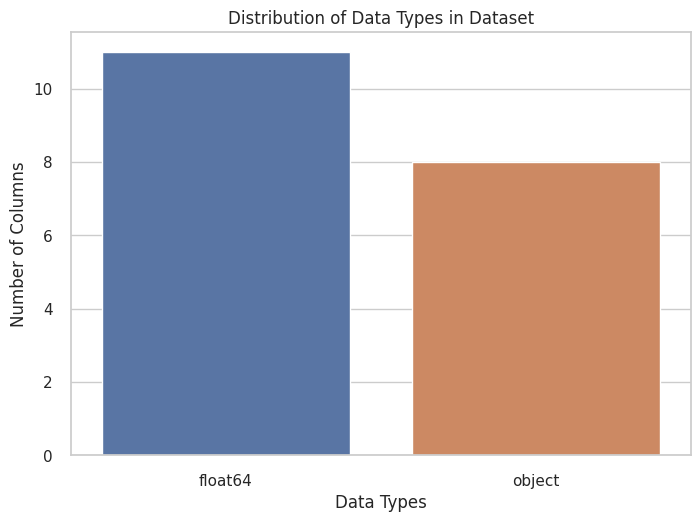

In [ ]:
# Visualization Data type
datatype_summary = data.dtypes.value_counts()

sns.barplot(x=datatype_summary.index, y=datatype_summary.values)
plt.xlabel('Data Types')
plt.ylabel('Number of Columns')
plt.title('Distribution of Data Types in Dataset')
plt.show()

## Duplicate Data Handling

In [ ]:
print("Jumlah duplikasi data: " + str(data.duplicated().sum()))

Jumlah duplikasi data: 0


## Missing Values Handling

In [ ]:
# Cek Null
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df) * 100
    missing_data = pd.concat([col_na, percent, df.dtypes], axis=1, keys=['Total', 'Percent', 'Dtype'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        return missing_data[missing_data['Total'] > 0]

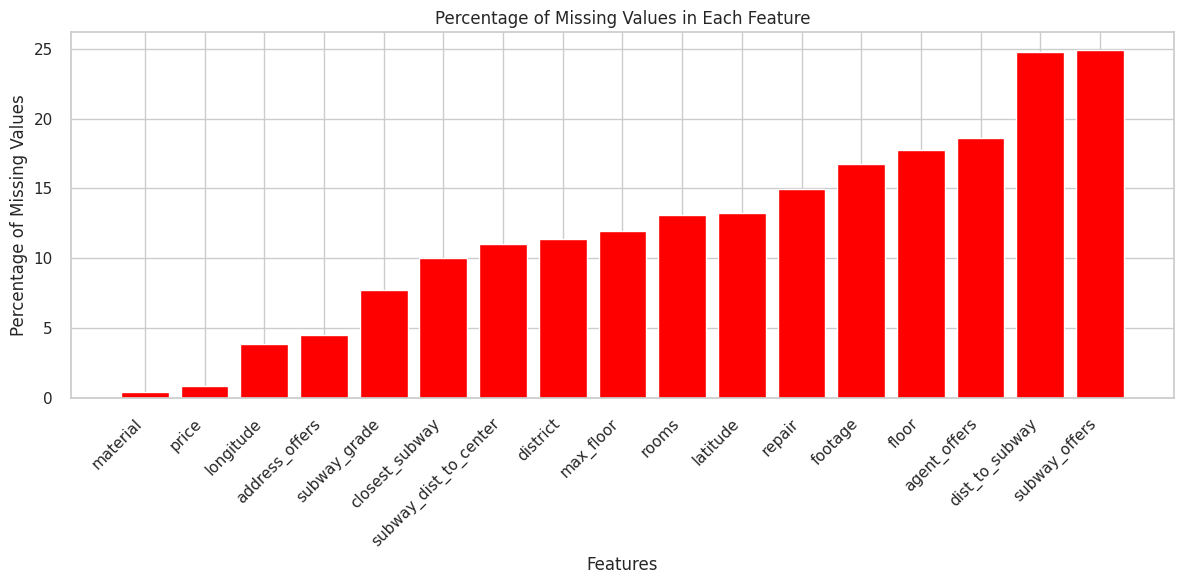

In [ ]:
missing_data = check_null(data)

plt.figure(figsize=(12, 6))
plt.bar(missing_data.index, missing_data['Percent'], color='red')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values in Each Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Melakukan drop row pada kolom dengan persentase data yang hilang sebesar < 5%
data.dropna(axis=0, subset=['material', 'price', 'longitude', 'address_offers'], inplace=True)
check_null(data)

,Total,Percent,Dtype
subway_grade,734,7.827663,object
closest_subway,923,9.843233,object
subway_dist_to_center,1024,10.920337,float64
district,1069,11.400235,object
max_floor,1133,12.082756,float64
rooms,1237,13.191852,object
latitude,1251,13.341154,float64
repair,1396,14.887491,object
footage,1578,16.828410,float64
floor,1666,17.766876,float64


In [ ]:
# Melakukan drop column subway_offers karena dianggap terlalu banyak data yang hilang dan informasi
# atribut tersebut cukup digantikan dengan closest_subway dan dist_to_subway
data.drop(columns='subway_offers', inplace=True)
check_null(data)

,Total,Percent,Dtype
subway_grade,734,7.827663,object
closest_subway,923,9.843233,object
subway_dist_to_center,1024,10.920337,float64
district,1069,11.400235,object
max_floor,1133,12.082756,float64
rooms,1237,13.191852,object
latitude,1251,13.341154,float64
repair,1396,14.887491,object
footage,1578,16.828410,float64
floor,1666,17.766876,float64


In [ ]:
# Untuk sisanya, lakukan imputasi data
for i in check_null(data).index:
  # Kasus jika kolom kategorikal
  if data[i].dtype == "object":
    data[i].fillna(data[i].mode()[0], inplace = True)
  # Kasus jika kolom numerikal dan dan berdistribusi skewed
  elif data[i].skew() < -0.5 or data[i].skew() > 0.5:
    data[i].fillna(data[i].median(), inplace = True)
  # Kasus jika kolom numerikal dan dan berdistribusi normal
  else:
    data[i].fillna(data[i].mean(), inplace = True)
check_null(data)

Tidak ditemukan missing value pada dataset


## Outlier Handling

In [ ]:
# Assuming 'data' is your DataFrame and you want to standardize the numerical columns
scaler = StandardScaler()

# Select numerical columns (this is an example, modify it according to your specific dataframe)
numerical_cols = data.select_dtypes(include=['float64'], exclude=['object']).columns

data_standardized = data.copy()

# Fit the scaler on the numerical data and transform it
data_standardized[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data_standardized = data_standardized[numerical_cols]

<Axes: >

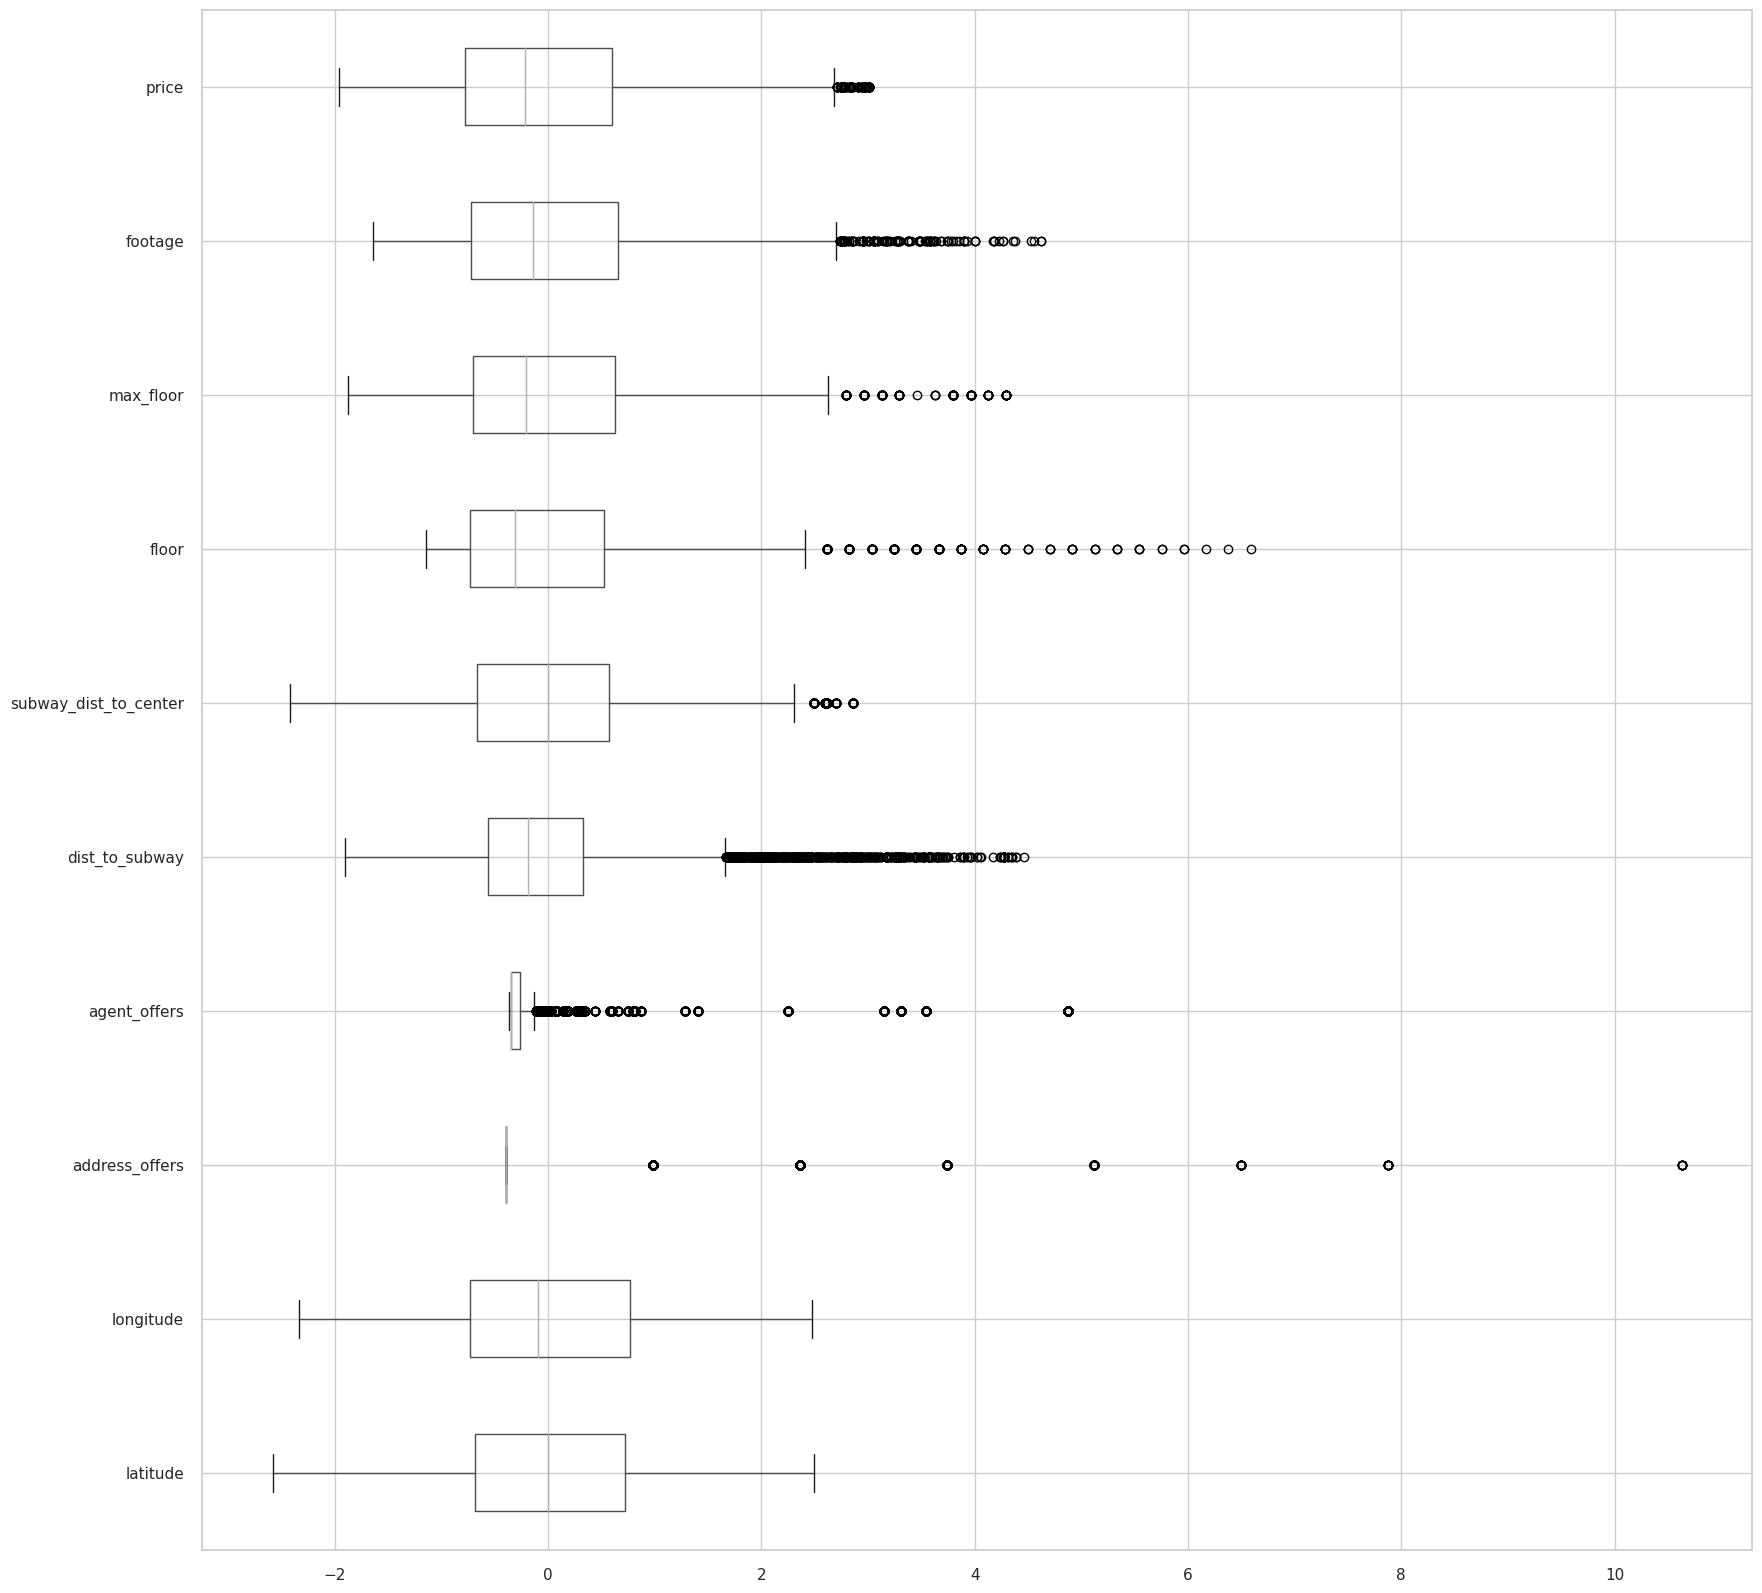

In [ ]:
data_standardized.boxplot(vert=False,figsize=(20,20))

In [ ]:
def check_outlier(df):
    Q1 = df.quantile(0.25, numeric_only=True)
    Q3 = df.quantile(0.75, numeric_only=True)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    col_out = ((df < lower_limit) | (df > upper_limit)).sum().sort_values(ascending=True)
    percent = col_out / len(df) * 100
    outliers = pd.concat([col_out, percent], axis=1, keys=['Total', 'Percent'])

    return outliers

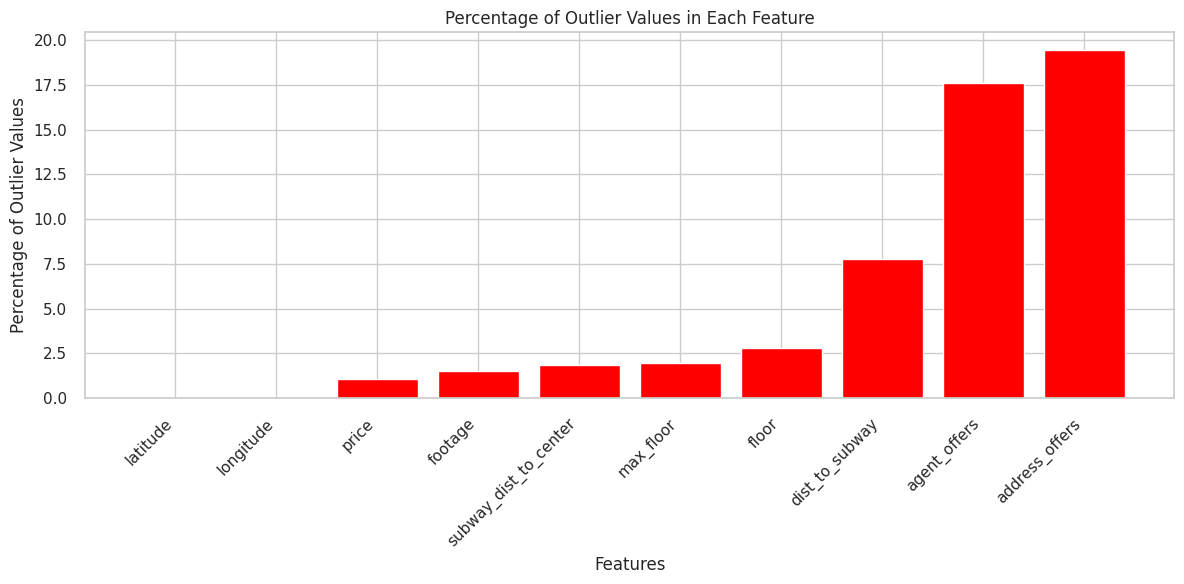

In [ ]:
outlier_data = check_outlier(data[numerical_cols])

plt.figure(figsize=(12, 6))
plt.bar(outlier_data.index, outlier_data['Percent'], color='red')
plt.xlabel('Features')
plt.ylabel('Percentage of Outlier Values')
plt.title('Percentage of Outlier Values in Each Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analisis Outliers:
Kami mengasumsikan semua outlier disini adalah true outlier. Contohnya pada atribut `floor` dimana nilai tertingginya adalah 38. Hal ini masuk akal untuk sebuah apartemen. Begitu juga dengan atribut-atribut lainnya.

## 1a Apakah terdapat hubungan antara lokasi bangunan dengan harga bangunan?

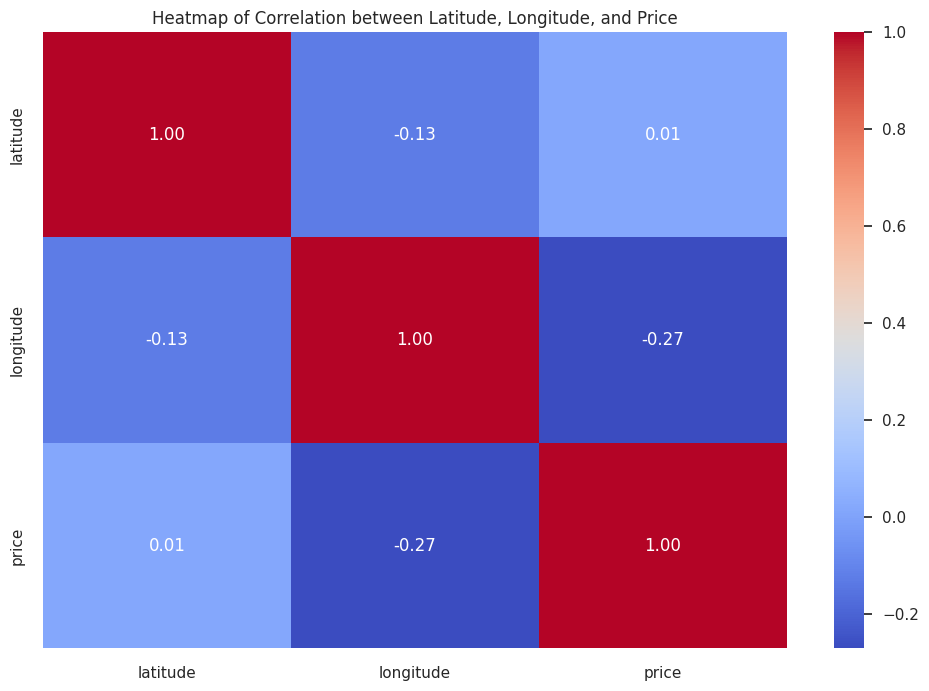

In [ ]:
heatmap_data = data_clean[['latitude', 'longitude', 'price']]

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(heatmap_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title('Heatmap of Correlation between Latitude, Longitude, and Price')

plt.show()

Berdasarkan koefisien korelasi
dengan metode pearson di atas, dapat disimpulkan bahwa
latitude dan longitude memiliki pengaruh yang sangat kecil terhadap  harga suatu bangunan.

## 1b Apa ciri-ciri bangunan yang dekat dengan subway dengan jenis kereta yang bukan bawah tanah?

In [ ]:
data_non_underground_close_to_subway = data_clean[(data_clean['subway_grade'] != 'Underground') & (data_clean['dist_to_subway'] < 500)]

# Characteristics
characteristics = ['latitude', 'longitude', 'district', 'address_offers', 'agent_offers', 'subway_grade', 'subway_dist_to_center',
                    'rooms', 'floor', 'max_floor', 'footage', 'material', 'repair',
                    'category_age', 'price']

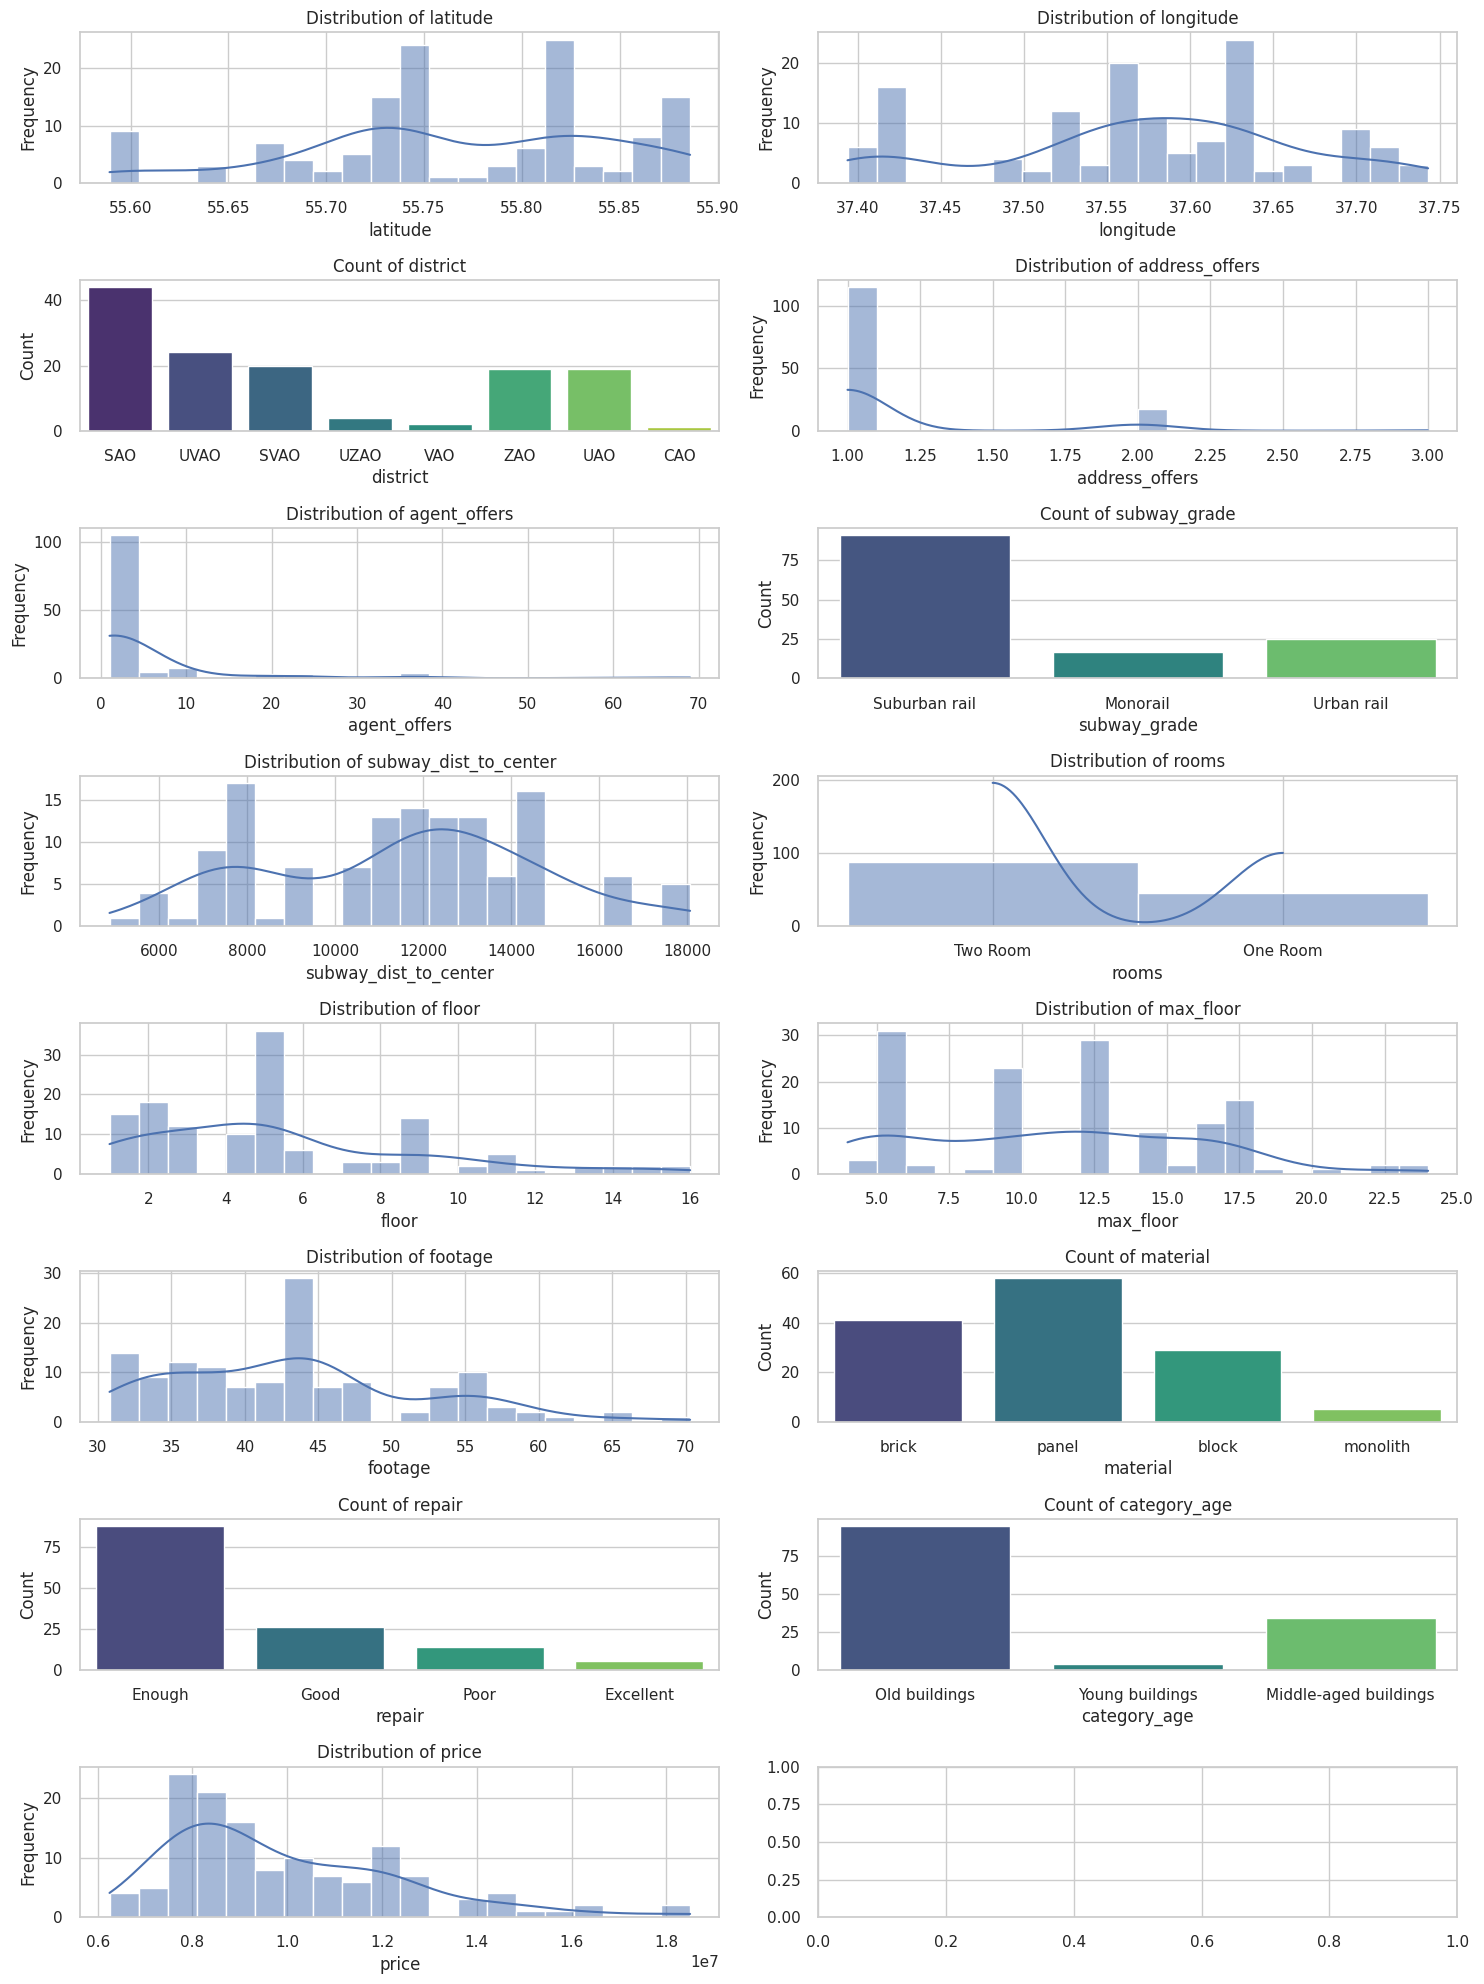

In [ ]:
sns.set(style="whitegrid")

# Calculate the number of rows and columns for subplots
num_plots = len(characteristics)
num_rows = num_plots // 2 + num_plots % 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

# Loop through each characteristic and create subplots
for i, char in enumerate(characteristics):
    row_index = i // num_cols
    col_index = i % num_cols

    if char in ['latitude', 'longitude', 'address_offers', 'agent_offers', 'subway_dist_to_center', 'rooms', 'floor', 'max_floor', 'footage', 'price']:
        # Create a histogram for numerical characteristics
        sns.histplot(data_non_underground_close_to_subway[char], bins=20, kde=True, ax=axes[row_index, col_index])
        axes[row_index, col_index].set_title(f'Distribution of {char}')
        axes[row_index, col_index].set_xlabel(char)
        axes[row_index, col_index].set_ylabel('Frequency')
    else:
        # Create a countplot for categorical characteristics
        sns.countplot(x=char, data=data_non_underground_close_to_subway, palette='viridis', ax=axes[row_index, col_index])
        axes[row_index, col_index].set_title(f'Count of {char}')
        axes[row_index, col_index].set_xlabel(char)
        axes[row_index, col_index].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Create a DataFrame to store the modes
modes_df = pd.DataFrame(columns=['Characteristic', 'Mode'])

# Calculate the mode for each characteristic and add it to the DataFrame
for char in characteristics:
    mode_value = data_non_underground_close_to_subway[char].mode().values[0]
    modes_df = modes_df.append({'Characteristic': char, 'Mode': mode_value}, ignore_index=True)

# Display the modes DataFrame
modes_df

<ipython-input-223-8139e90d5978>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modes_df = modes_df.append({'Characteristic': char, 'Mode': mode_value}, ignore_index=True)
<ipython-input-223-8139e90d5978>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modes_df = modes_df.append({'Characteristic': char, 'Mode': mode_value}, ignore_index=True)
<ipython-input-223-8139e90d5978>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modes_df = modes_df.append({'Characteristic': char, 'Mode': mode_value}, ignore_index=True)
<ipython-input-223-8139e90d5978>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modes_df = modes_df.append({'Characteris

,Characteristic,Mode
0,latitude,55.738255
1,longitude,37.624858
2,district,SAO
3,address_offers,1.0
4,agent_offers,1.0
5,subway_grade,Suburban rail
6,subway_dist_to_center,14761.0
7,rooms,Two Room
8,floor,5.0
9,max_floor,5.0


Karakteristik bangunan dengan syarat bangunan dekat dengan subway dan jenis kereta subway_grade adalah underground seperti tabel diatas.

## 1c Apakah kondisi perbaikan bangunan yang buruk merupakan bangunan tua?

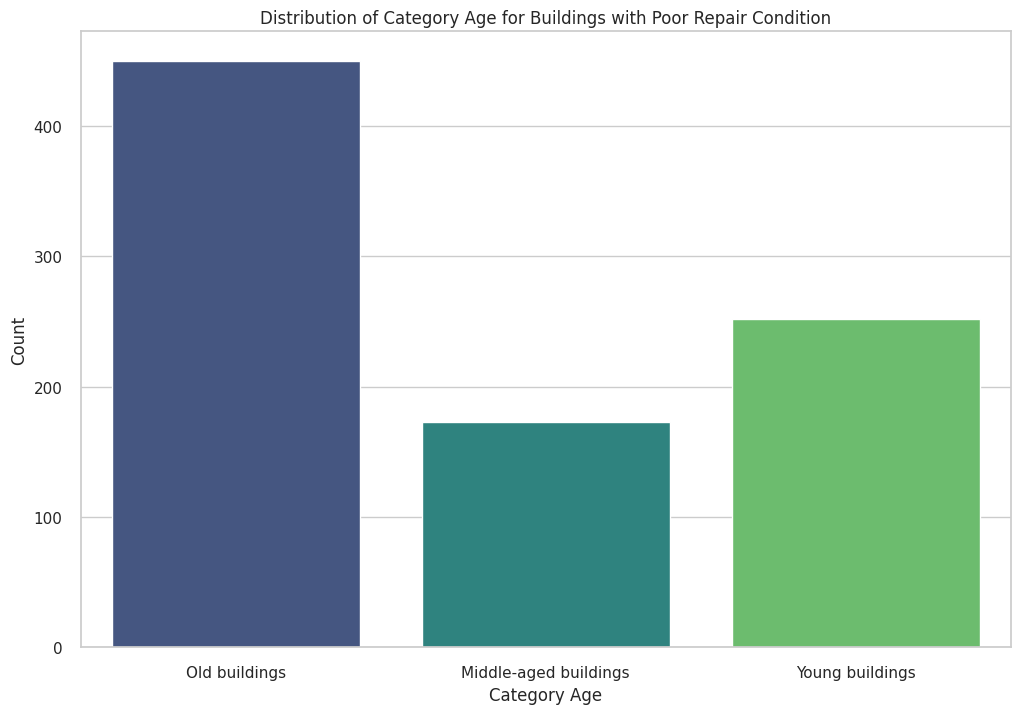

In [ ]:
poor_repair_data = data_clean[data_clean['repair'] == 'Poor']

plt.figure(figsize=(12, 8))
sns.countplot(x='category_age', data=poor_repair_data, palette='viridis')

plt.title('Distribution of Category Age for Buildings with Poor Repair Condition')
plt.xlabel('Category Age')
plt.ylabel('Count')

plt.show()

Dilihat dari gambar, distribusi usia bangunan dengan kategori kondisi poor adalah menunjukkan bahwa mayoritas dari persebaran tersebut adalah bangunan tua. Meskipun begitu, hal tersebut tidak dapat menjustifikasi bahwa bangunan buruk = bangunan tua karena terdapat persebaran lain, seperti bangunan semi tua dan bangunan muda.



```
# This is formatted as code
```

## 1d Apakah distrik dengan total tawaran tertinggi?

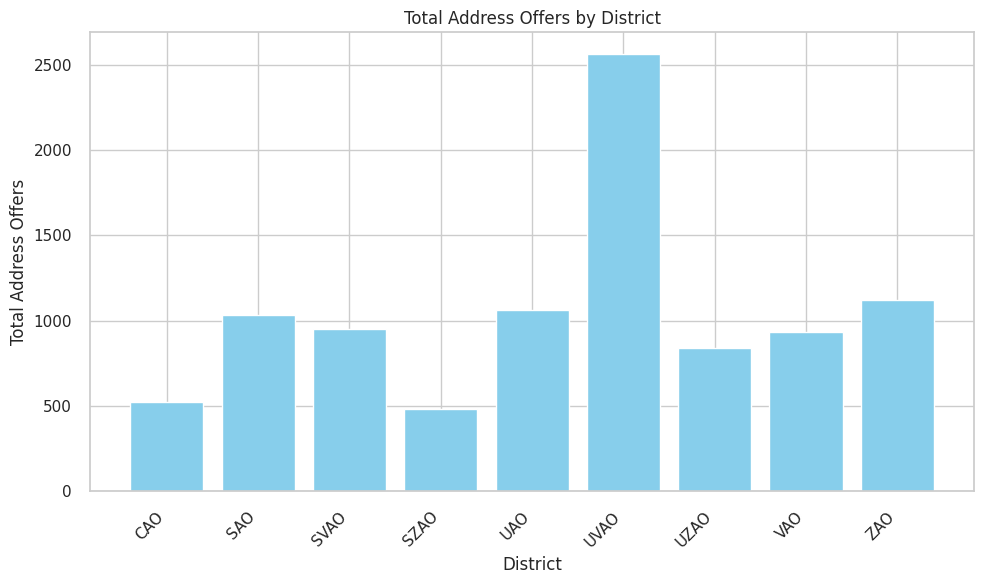

In [ ]:
district_data = data_clean.groupby('district')['address_offers'].sum()

plt.figure(figsize=(10, 6))
plt.bar(district_data.index, district_data.values, color='skyblue')
plt.title('Total Address Offers by District')
plt.xlabel('District')
plt.ylabel('Total Address Offers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

Dapat terlihat bahwa distrik UVAO memiliki tawaran terbanyak.

## 1e Berdasarkan rata-rata harga bangunan, berikan urutan dari tiap kategori material!

<ipython-input-226-12e6e3a1dafa>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='material', y='price', data=data_clean, sort=True, palette='viridis')


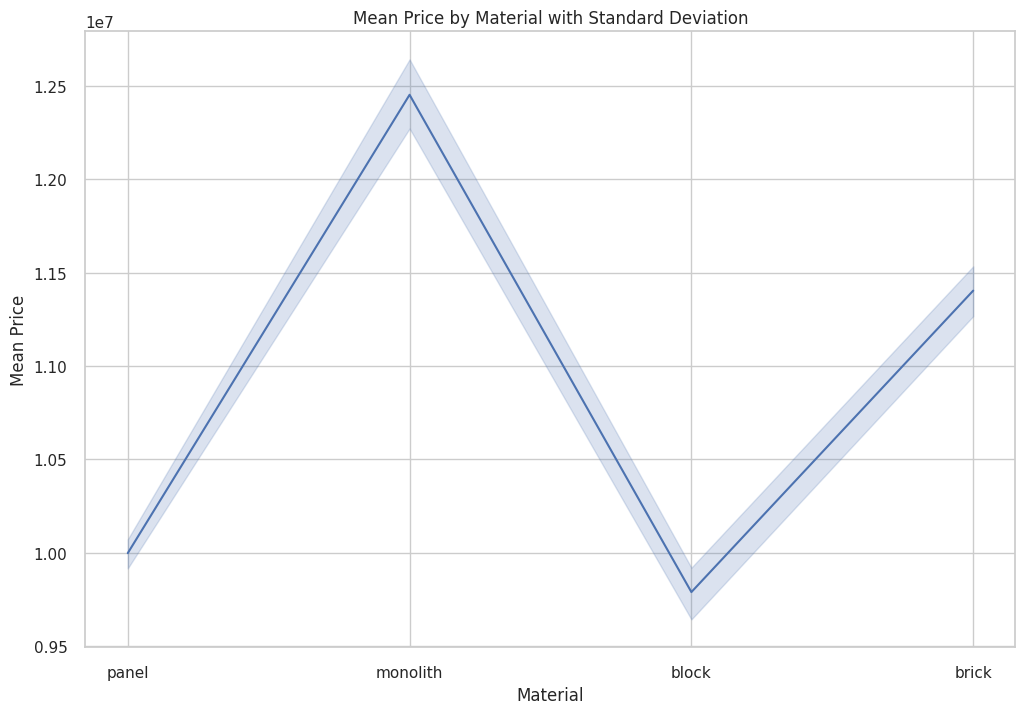

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='material', y='price', data=data_clean, sort=True, palette='viridis')

plt.title('Mean Price by Material with Standard Deviation')
plt.xlabel('Material')
plt.ylabel('Mean Price')

plt.show()

Berdasarkan gambar, dapat disimpulkan bahwa material dengan urutan termahal hingga termurah adalah monolith, brick, panel, dan block.

## 1f Berdasarkan rata-rata harga bangunan, berikan urutan dari tiap kategori usia bangunan!

<ipython-input-227-2ebd929a265a>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='category_age', y='price', data=data_clean, sort=True, palette='viridis')


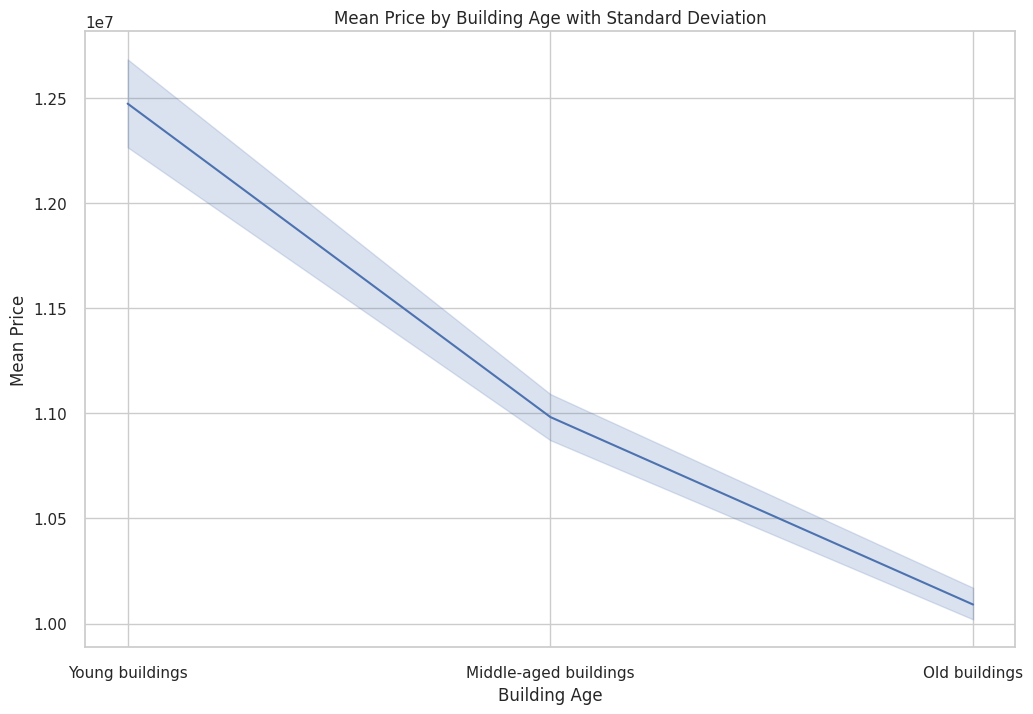

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='category_age', y='price', data=data_clean, sort=True, palette='viridis')

plt.title('Mean Price by Building Age with Standard Deviation')
plt.xlabel('Building Age')
plt.ylabel('Mean Price')

plt.show()

Berdasarkan gambar, dapat disimpulkan bahwa usia bangunan dengan urutan termahal hingga termurah adalah bangunan muda, pertengahan, dan tua.

# 2a - **Classification**

*Buatlah model untuk memprediksi harga jual dari apartemen*

Untuk proses klasifikasi, kami melakukan serangkaian percobaan dengan membangun model menggunakan tiga jenis metode:
1. **K-Nearest Neighbour (KNN)**: Dipilih karena kemudahannya dalam mengidentifikasi pola berdasarkan kedekatan atau kesamaan data, cocok untuk dataset yang tidak terlalu besar.
2. **Neural Network**: Digunakan karena kemampuannya menangani data berdimensi tinggi dan mengungkap hubungan non-linear, ideal untuk pola data yang kompleks.
3. **Random Forest**: Terpilih karena kekuatannya dalam menangani fitur kategorikal dan numerik serta keunggulan dalam mencegah overfitting, memberikan hasil yang robust dan interpretasi yang baik.

### Metric Evaluator

In [ ]:
# Classifier Performance Evaluation

def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

## Initial Preparation

In [ ]:
# Copy Data_Clean
data_classification = data.copy()

In [ ]:
# Melihat nama atribut dalam dataframe
print("-----Berikut adalah daftar kolom/attribut dalam dataset-----")
print()
for col in data_clean.columns:
    print(col)

-----Berikut adalah daftar kolom/attribut dalam dataset-----

ID
latitude
longitude
district
address_offers
agent_offers
closest_subway
dist_to_subway
subway_grade
subway_dist_to_center
rooms
floor
max_floor
footage
material
repair
price
category_age


## Initial Preparation & Feature Engineering

### Drop ID

In [ ]:
# Mendrop ID
data_classification = data_classification.drop(columns="ID", axis=1)

### Standardize Numerical Features

In [ ]:
# Get Numerical Columns
numerical_columns = data_classification.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Using StandarScaler
scaler = StandardScaler()

# Fit and transform the scaler on the numerical columns
data_classification[numerical_columns] = scaler.fit_transform(data_classification[numerical_columns])

### Class Imbalance Exploration

In [ ]:
# Exploration
print("-----Berikut adalah distribusi class category_age dalam dataset-----")
class_distribution = data_classification['category_age'].value_counts()

print(class_distribution)

-----Berikut adalah distribusi class category_age dalam dataset-----
Old buildings            5036
Middle-aged buildings    2788
Young buildings          1553
Name: category_age, dtype: int64


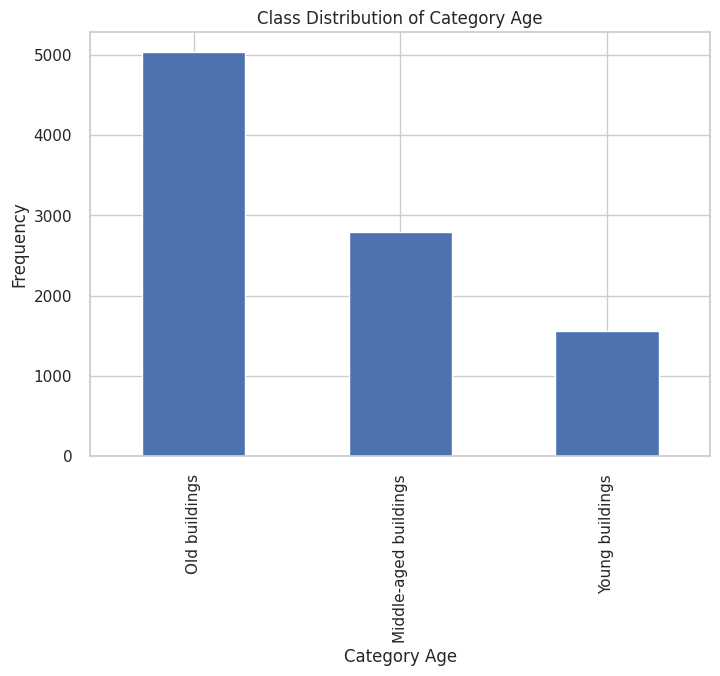

In [ ]:
# Visualization
data_classification['category_age'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Category Age')
plt.xlabel('Category Age')
plt.ylabel('Frequency')
plt.show()

### Encoding Categorical Features

In [ ]:
# Get Categorical Columns
categorical_columns = data_classification.select_dtypes(include=['object']).columns

In [ ]:
# Encoding using Label Encoders
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_classification[column] = label_encoders[column].fit_transform(data_classification[column])

### Feature Engineering

In [ ]:
# Fit K-Means
kmeans = KMeans(n_clusters=10, random_state=42)  # for example, 10 clusters

# Creating new column 'geo_cluster'
data_classification['geo_cluster'] = kmeans.fit_predict(data_classification[['latitude', 'longitude']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Dataset Preview

In [ ]:
data_classification.head()

,latitude,longitude,district,address_offers,agent_offers,closest_subway,dist_to_subway,subway_grade,subway_dist_to_center,rooms,floor,max_floor,footage,material,repair,price,category_age,geo_cluster
0,-0.439990,2.391336,5,-0.397914,-0.349959,35,-0.294536,2,1.885869,0,0.524961,-0.208810,-0.602892,3,2,-0.879263,2,7
1,-0.354921,1.083256,5,-0.397914,-0.349959,54,-0.991684,2,-0.293801,1,0.524961,0.625097,2.117731,2,1,1.031238,0,0
2,1.014493,-0.296241,2,-0.397914,-0.349959,172,-1.244025,2,-0.918456,0,-0.729514,-0.709155,-1.387687,0,1,-0.582806,1,5
3,-0.573119,1.393491,5,-0.397914,-0.349959,51,2.851182,2,0.347463,1,-0.102277,0.124753,-0.822634,0,3,-1.076901,1,7
4,-0.769445,0.470899,4,-0.397914,-0.349959,47,0.642122,2,-0.689513,1,1.152199,-0.208810,-0.393613,0,0,-0.187530,1,4


### Data Splitting

In [ ]:
# Preparing the data
X = data_classification.drop('category_age', axis=1)  # Features
y = data_classification['category_age']               # Target variable

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Class Imbalance Handling

In [ ]:
# SMOTE Resampling for Training Data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

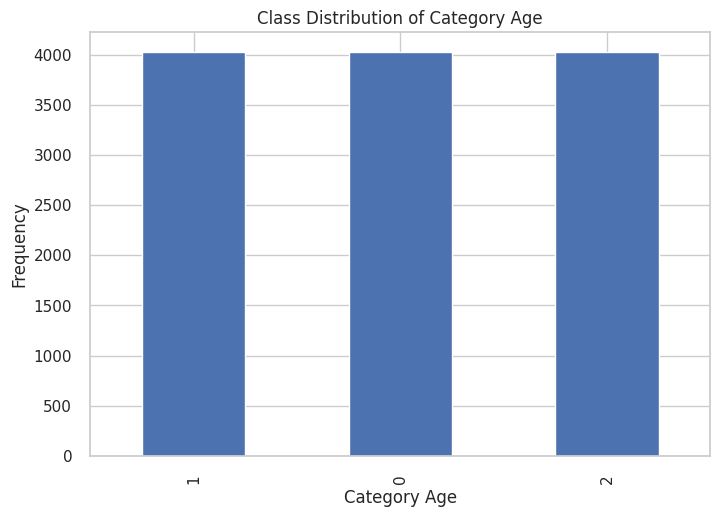

In [ ]:
# Visualization
y_train_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution of Category Age')
plt.xlabel('Category Age')
plt.ylabel('Frequency')
plt.show()

## **Model 1 - Random Forest**

In [ ]:
# Parameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
}

In [ ]:
# RandomForest Model
rf_md = RandomForestClassifier()

# Fitting
rf_md.fit(X_train_resampled, y_train_resampled)

# Memprediksi data testing
predicted = rf_md.predict(X_test)

# Menampilkan metrics
evaluate_classifier_performance(predicted, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       573
           1       0.93      0.93      0.93      1010
           2       0.82      0.82      0.82       293

    accuracy                           0.87      1876
   macro avg       0.85      0.85      0.85      1876
weighted avg       0.87      0.87      0.87      1876



Confusion Matrix



prediction,0,1,2
actual,,,
0,457,65,51
1,69,940,1
2,45,8,240




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8726012793176973
F1 Macro Average: 0.8495922570317035
F1 Micro Average: 0.8726012793176973
Precision Macro Average: 0.8500682974130015
Precision Micro Average: 0.8726012793176973
Recall Macro Average: 0.8491208054386554
Recall Micro Average: 0.8726012793176973



In [ ]:
# Optimization
grid_search = GridSearchCV(estimator=rf_md, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [ ]:
# grid_search.fit(X_train_resampled, y_train_resampled)

In [ ]:
# best_params = grid_search.best_params_

best_params = {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
print("Best parameters found: ", best_params)

Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# Create a new instance of RandomForestClassifier with these parameters
rf_md_best = RandomForestClassifier(**best_params)
rf_md_best.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=30, n_estimators=300)

In [ ]:
# Prediction on improved model
predicted_best = rf_md_best.predict(X_test)
evaluate_classifier_performance(predicted_best, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       573
           1       0.93      0.93      0.93      1010
           2       0.82      0.84      0.83       293

    accuracy                           0.88      1876
   macro avg       0.85      0.86      0.86      1876
weighted avg       0.88      0.88      0.88      1876



Confusion Matrix



prediction,0,1,2
actual,,,
0,459,62,52
1,69,939,2
2,38,9,246




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8763326226012793
F1 Macro Average: 0.8551175716096692
F1 Micro Average: 0.8763326226012794
Precision Macro Average: 0.8535523446337566
Precision Micro Average: 0.8763326226012793
Recall Macro Average: 0.8567801781339616
Recall Micro Average: 0.8763326226012793



## **Model 2 - K Nearest Neighbor**

In [ ]:
# Mengatur jumlah pelatihan pada fold fold yang ada.
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

In [ ]:
# Optimization
tunned_params = [{'n_neighbors': [1,2,3,4,5,6,7,8],'metric': ['minkowski', 'euclidean', 'manhattan', 'jaccard']}]
model_knn = KNeighborsClassifier()

print("Tuning hyper-parameters model KNN")
best_knn = GridSearchCV(
    model_knn,
    tunned_params,
    scoring="accuracy",
    cv=kfold,
    verbose = 3
)

best_knn.fit(X_train_resampled, y_train_resampled)

Tuning hyper-parameters model KNN
Fitting 4 folds for each of 32 candidates, totalling 128 fits
[CV 1/4] END ...metric=minkowski, n_neighbors=1;, score=0.905 total time=   0.3s
[CV 2/4] END ...metric=minkowski, n_neighbors=1;, score=0.903 total time=   0.3s
[CV 3/4] END ...metric=minkowski, n_neighbors=1;, score=0.898 total time=   0.3s
[CV 4/4] END ...metric=minkowski, n_neighbors=1;, score=0.899 total time=   0.3s
[CV 1/4] END ...metric=minkowski, n_neighbors=2;, score=0.865 total time=   0.3s
[CV 2/4] END ...metric=minkowski, n_neighbors=2;, score=0.870 total time=   0.3s
[CV 3/4] END ...metric=minkowski, n_neighbors=2;, score=0.867 total time=   0.3s
[CV 4/4] END ...metric=minkowski, n_neighbors=2;, score=0.866 total time=   0.3s
[CV 1/4] END ...metric=minkowski, n_neighbors=3;, score=0.875 total time=   0.3s
[CV 2/4] END ...metric=minkowski, n_neighbors=3;, score=0.878 total time=   0.3s
[CV 3/4] END ...metric=minkowski, n_neighbors=3;, score=0.866 total time=   0.3s
[CV 4/4] END 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/4] END .....metric=jaccard, n_neighbors=1;, score=0.373 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/4] END .....metric=jaccard, n_neighbors=1;, score=0.404 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/4] END .....metric=jaccard, n_neighbors=1;, score=0.369 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/4] END .....metric=jaccard, n_neighbors=1;, score=0.419 total time=   1.8s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/4] END .....metric=jaccard, n_neighbors=2;, score=0.380 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/4] END .....metric=jaccard, n_neighbors=2;, score=0.436 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/4] END .....metric=jaccard, n_neighbors=2;, score=0.412 total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/4] END .....metric=jaccard, n_neighbors=2;, score=0.430 total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/4] END .....metric=jaccard, n_neighbors=3;, score=0.348 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/4] END .....metric=jaccard, n_neighbors=3;, score=0.425 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/4] END .....metric=jaccard, n_neighbors=3;, score=0.420 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/4] END .....metric=jaccard, n_neighbors=3;, score=0.436 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/4] END .....metric=jaccard, n_neighbors=4;, score=0.487 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/4] END .....metric=jaccard, n_neighbors=4;, score=0.438 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/4] END .....metric=jaccard, n_neighbors=4;, score=0.446 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/4] END .....metric=jaccard, n_neighbors=4;, score=0.440 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/4] END .....metric=jaccard, n_neighbors=5;, score=0.470 total time=   3.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/4] END .....metric=jaccard, n_neighbors=5;, score=0.449 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/4] END .....metric=jaccard, n_neighbors=5;, score=0.449 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/4] END .....metric=jaccard, n_neighbors=5;, score=0.436 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/4] END .....metric=jaccard, n_neighbors=6;, score=0.462 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/4] END .....metric=jaccard, n_neighbors=6;, score=0.454 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/4] END .....metric=jaccard, n_neighbors=6;, score=0.448 total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/4] END .....metric=jaccard, n_neighbors=6;, score=0.488 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/4] END .....metric=jaccard, n_neighbors=7;, score=0.466 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/4] END .....metric=jaccard, n_neighbors=7;, score=0.453 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/4] END .....metric=jaccard, n_neighbors=7;, score=0.495 total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/4] END .....metric=jaccard, n_neighbors=7;, score=0.437 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 1/4] END .....metric=jaccard, n_neighbors=8;, score=0.429 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 2/4] END .....metric=jaccard, n_neighbors=8;, score=0.443 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 3/4] END .....metric=jaccard, n_neighbors=8;, score=0.496 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


[CV 4/4] END .....metric=jaccard, n_neighbors=8;, score=0.490 total time=   3.0s


GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['minkowski', 'euclidean', 'manhattan',
                                     'jaccard'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]}],
             scoring='accuracy', verbose=3)

In [ ]:
print("Best parameters set found on development set:")
print(best_knn.best_params_)

Best parameters set found on development set:
{'metric': 'manhattan', 'n_neighbors': 1}


In [ ]:
best_knn_model = KNeighborsClassifier(**best_knn.best_params_)

In [ ]:
best_knn_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [ ]:
y_true, y_pred = y_test, best_knn_model.predict(X_test)

In [ ]:
# Result
evaluate_classifier_performance(y_pred, y_true)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       573
           1       0.88      0.88      0.88      1010
           2       0.78      0.81      0.79       293

    accuracy                           0.83      1876
   macro avg       0.81      0.81      0.81      1876
weighted avg       0.83      0.83      0.83      1876



Confusion Matrix



prediction,0,1,2
actual,,,
0,424,104,45
1,96,892,22
2,36,21,236




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8272921108742004
F1 Macro Average: 0.8077239615980732
F1 Micro Average: 0.8272921108742004
Precision Macro Average: 0.8061857649019077
Precision Micro Average: 0.8272921108742004
Recall Macro Average: 0.8095313878903213
Recall Micro Average: 0.8272921108742004



## **Model 3 - Neural Network**

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(40,80,20 ),  # Example: one hidden layer with 100 neurons
                    activation='relu',  # Activation function for the hidden layer
                    solver='adam',  # The solver for weight optimization
                    max_iter=200,  # Maximum number of iterations
                    random_state=42)

In [ ]:
mlp.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(40, 80, 20), random_state=42)

In [ ]:
prediction = mlp.predict(X_test)
evaluate_classifier_performance(prediction, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.70      0.77      0.74       573
           1       0.92      0.87      0.89      1010
           2       0.76      0.75      0.75       293

    accuracy                           0.82      1876
   macro avg       0.79      0.80      0.79      1876
weighted avg       0.83      0.82      0.82      1876



Confusion Matrix



prediction,0,1,2
actual,,,
0,443,72,58
1,120,878,12
2,67,6,220




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8214285714285714
F1 Macro Average: 0.7947977381404504
F1 Micro Average: 0.8214285714285714
Precision Macro Average: 0.7934017782235934
Precision Micro Average: 0.8214285714285714
Recall Macro Average: 0.797761360754484
Recall Micro Average: 0.8214285714285714



In [ ]:
# Optimization

model = MLPClassifier(random_state=42)

In [ ]:
# Define the parameter space for RandomizedSearch
params = {
    'model__hidden_layer_sizes': [(100,), (100,200,20), (20, 40), (40,80,20)],
    'model__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'model__solver': ['sgd', 'adam'],
    'model__alpha': stats.uniform(1e-4, 5e-2)
}

In [ ]:
# Stratified K-Fold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Creating a pipeline
steps = [('model', model)]
pipeline = Pipeline(steps=steps)

In [ ]:
# Initialize RandomizedSearchCV
clf = RandomizedSearchCV(
    pipeline,
    params,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1,
    random_state=42
)

In [ ]:
# Fit RandomizedSearchCV to the resampled training data
clf.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('model',
                                              MLPClassifier(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__activation': ['identity',
                                                              'logistic',
                                                              'tanh', 'relu'],
                                        'model__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7efabe5c56f0>,
                                        'model__hidden_layer_sizes': [(100,),
                                                                      (100, 200,
                                                                       20),
                                                                      (20, 40),
                                                                      (40, 80,
                                                                       20)],
                                        'model__solver': ['sgd', 'adam']},
                   random_state=42, scoring='f1_macro')

In [ ]:
# You can then review the best parameters and scores
print("Best parameters found: ", clf.best_params_)

Best parameters found:  {'model__activation': 'relu', 'model__alpha': 0.03786807051588263, 'model__hidden_layer_sizes': (100, 200, 20), 'model__solver': 'adam'}


In [ ]:
# NOTE: Parameter dibawah merupakan hasil dari clf.best_params_ saat pengerjaan
best_mlp = MLPClassifier(
    hidden_layer_sizes=(100,200,20),
    activation='relu',
    alpha=0.018418092164684586,
    solver='adam',
    random_state=42
)
best_mlp.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.018418092164684586, hidden_layer_sizes=(100, 200, 20),
              random_state=42)

In [ ]:
best_prediction = best_mlp.predict(X_test)
evaluate_classifier_performance(best_prediction, y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       573
           1       0.90      0.91      0.91      1010
           2       0.77      0.73      0.75       293

    accuracy                           0.83      1876
   macro avg       0.80      0.80      0.80      1876
weighted avg       0.83      0.83      0.83      1876



Confusion Matrix



prediction,0,1,2
actual,,,
0,432,85,56
1,81,920,9
2,68,12,213




Butuh informasi lebih lengkap? silakan simak di bawah ini : 
Accuracy Average: 0.8342217484008528
F1 Macro Average: 0.8008350515248468
F1 Micro Average: 0.8342217484008528
Precision Macro Average: 0.8047846989900299
Precision Micro Average: 0.8342217484008528
Recall Macro Average: 0.7972600826724919
Recall Micro Average: 0.8342217484008528



## Kesimpulan Model

Berdasarkan hasil evaluasi yang diberikan, berikut adalah kesimpulan terkait performa dari ketiga model klasifikasi yang diuji - Random Forest, K-Nearest Neighbors (KNN), dan Neural Network (NN):

1. **Random Forest**:
   - Random Forest menunjukkan performa yang paling tinggi di antara ketiga model.
   - Memiliki nilai rata-rata keakuratan (Accuracy Average) tertinggi yakni 0.8813, menandakan bahwa model ini berhasil mengklasifikasikan sekitar 88.13% dari data dengan benar.
   - Nilai rata-rata F1-Score baik dalam skala makro (F1 Macro Average) maupun mikro (F1 Micro Average) juga tinggi, yaitu sekitar 0.8508 dan 0.8813, mengindikasikan keseimbangan yang baik antara presisi dan recall.
   - Presisi dan Recall yang tinggi (di atas 0.85 untuk rata-rata makro) juga menegaskan bahwa model ini efektif dalam mengidentifikasi kelas positif dan negatif dengan akurat.

2. **K-Nearest Neighbors (KNN)**:
   - KNN menunjukkan performa yang baik, namun lebih rendah dibandingkan dengan Random Forest.
   - Keakuratan rata-rata sekitar 0.8122 menunjukkan bahwa model ini cukup efektif, namun masih memiliki ruang untuk peningkatan.
   - F1-Score rata-rata (makro dan mikro) berada di kisaran 0.7739 dan 0.8122, yang menunjukkan adanya keseimbangan antara presisi dan recall, tetapi tidak seefektif Random Forest.
   - Presisi dan Recall rata-rata makro juga lebih rendah dibandingkan dengan Random Forest, menandakan kemampuan yang lebih rendah dalam mengklasifikasikan kelas secara tepat.

3. **Neural Network (NN)**:
   - Neural Network menunjukkan performa yang serupa dengan KNN, tetapi sedikit lebih tinggi.
   - Keakuratan rata-rata mencapai 0.83, yang berarti model ini efektif tetapi tidak seoptimal Random Forest.
   - F1-Score, baik makro maupun mikro, serta Presisi dan Recall rata-rata (makro dan mikro) berada di kisaran 0.7574 hingga 0.8021, menandakan bahwa model ini memiliki keseimbangan antara presisi dan recall tetapi dengan tingkat efektivitas yang lebih rendah dibandingkan dua model lainnya.

**Hasil akhir**:
- Dari ketiga model yang diuji, **Random Forest** menunjukkan performa yang paling unggul dalam hampir semua aspek metrik yang dinilai, menjadikannya pilihan model terbaik dari kelompok ini.
- KNN dan NN juga menunjukkan hasil yang baik, tetapi mereka lebih cocok untuk skenario di mana kompromi antara keakuratan dan kompleksitas komputasi menjadi pertimbangan.

## Kaggle - Classification

In [ ]:
# Best Parameters
best_params = {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

In [ ]:
data_classification.head()

,latitude,longitude,district,address_offers,agent_offers,closest_subway,dist_to_subway,subway_grade,subway_dist_to_center,rooms,floor,max_floor,footage,material,repair,price,category_age,geo_cluster
0,-0.439990,2.391336,5,-0.397914,-0.349959,35,-0.294536,2,1.885869,0,0.524961,-0.208810,-0.602892,3,2,-0.879263,2,7
1,-0.354921,1.083256,5,-0.397914,-0.349959,54,-0.991684,2,-0.293801,1,0.524961,0.625097,2.117731,2,1,1.031238,0,0
2,1.014493,-0.296241,2,-0.397914,-0.349959,172,-1.244025,2,-0.918456,0,-0.729514,-0.709155,-1.387687,0,1,-0.582806,1,5
3,-0.573119,1.393491,5,-0.397914,-0.349959,51,2.851182,2,0.347463,1,-0.102277,0.124753,-0.822634,0,3,-1.076901,1,7
4,-0.769445,0.470899,4,-0.397914,-0.349959,47,0.642122,2,-0.689513,1,1.152199,-0.208810,-0.393613,0,0,-0.187530,1,4


In [ ]:
kaggle_data_training = data_classification.copy()

In [ ]:
# Preparing the data
X_final = kaggle_data_training.drop('category_age', axis=1)  # Features
y_final = kaggle_data_training['category_age']               # Target variable

In [ ]:
# SMOTE Resampling for Training Data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled_final , y_train_resampled_final = smote.fit_resample(X_train, y_train)

In [ ]:
# Create a new instance of RandomForestClassifier with these parameters
rf_md_best_final = RandomForestClassifier(**best_params)
rf_md_best_final.fit(X_train_resampled_final, y_train_resampled_final)

RandomForestClassifier(max_depth=30, n_estimators=300)

In [ ]:
# Read
kaggle_classification_data = pd.read_csv('apartment_listings_test_classif.csv')

In [ ]:
# Drop subway_offers
kaggle_classification_data.drop(columns='subway_offers', inplace=True)

In [ ]:
# Save ID
ID = kaggle_classification_data['ID']

# Drop ID
kaggle_classification_data.drop(columns="ID", inplace=True)

In [ ]:
# Imputation

for i in check_null(kaggle_classification_data).index:
  # Kasus jika kolom kategorikal
  if kaggle_classification_data[i].dtype == "object":
    kaggle_classification_data[i].fillna(kaggle_classification_data[i].mode()[0], inplace = True)
  # Kasus jika kolom numerikal dan dan berdistribusi skewed
  elif kaggle_classification_data[i].skew() < -0.5 or kaggle_classification_data[i].skew() > 0.5:
    kaggle_classification_data[i].fillna(kaggle_classification_data[i].median(), inplace = True)
  # Kasus jika kolom numerikal dan dan berdistribusi normal
  else:
    kaggle_classification_data[i].fillna(kaggle_classification_data[i].mean(), inplace = True)

In [ ]:
# Feature Engineering 'geo_cluster'

kmeans_kaggle = KMeans(n_clusters=10, random_state=42)  # for example, 10 clusters
kaggle_classification_data['geo_cluster'] = kmeans_kaggle.fit_predict(kaggle_classification_data[['latitude', 'longitude']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Normalization
scaler = StandardScaler()
numerical_columns = kaggle_classification_data.select_dtypes(include=['int64', 'float64']).columns
kaggle_classification_data[numerical_columns] = scaler.fit_transform(kaggle_classification_data[numerical_columns])


In [ ]:
# Encoding
categorical_columns = kaggle_classification_data.select_dtypes(include=['object']).columns

testing_label_encoders = {}
for column in categorical_columns:
    testing_label_encoders[column] = LabelEncoder()
    kaggle_classification_data[column] = testing_label_encoders[column].fit_transform(kaggle_classification_data[column])


In [ ]:
# Predicting Using The Best Model: Random Forest
test_predictions = rf_md_best_final.predict(kaggle_classification_data)

In [ ]:
# Decoding
category_age_encoder = label_encoders['category_age']
decoded_category_age = category_age_encoder.inverse_transform(test_predictions)

In [ ]:
# Export
classification_AL = pd.DataFrame({'ID': ID, 'category_age': decoded_category_age})
classification_AL.to_csv('classification_AL_KASMOM_Final.csv', index=False)

# 2c - Clustering

Lakukan clustering pada dataset dan hubungkan karakteristik dari masing-masing cluster yang didapatkan dengan suatu fitur, seperti fasilitas properti atau tipe properti!

In [ ]:
num_of_cluster = [2, 3, 4, 5, 6, 7, 8, 9]

features_for_clustering = data_clean[['district', 'dist_to_subway', 'category_age', 'repair', 'material', 'price']]

In [ ]:
# Convert categorical columns to numerical using LabelEncoder
from sklearn.calibration import LabelEncoder

original_encoded_df = features_for_clustering.copy()

le = LabelEncoder()
category_columns = ['category_age', 'repair', 'material', 'district']

# Display original and encoded values for each categorical column
for col in category_columns:
    # Fit and transform the original data
    original_encoded_df[col + '_encoded'] = le.fit_transform(features_for_clustering[col])

    # Display original and encoded values
    print(f"Column: {col}")
    print("Original Values:", features_for_clustering[col].unique())
    print("Encoded Values:", original_encoded_df[col + '_encoded'].unique())
    print("="*75)

# Reselect features for clustering (including the encoded columns)
features_for_clustering = original_encoded_df[['dist_to_subway', 'category_age_encoded', 'repair_encoded', 'material_encoded', 'district_encoded', 'price']]

Column: category_age
Original Values: ['Young buildings' 'Middle-aged buildings' 'Old buildings']
Encoded Values: [2 0 1]
Column: repair
Original Values: ['Good' 'Excellent' 'Poor' 'Enough']
Encoded Values: [2 1 3 0]
Column: material
Original Values: ['panel' 'monolith' 'block' 'brick']
Encoded Values: [3 2 0 1]
Column: district
Original Values: ['UVAO' 'SVAO' 'UAO' 'ZAO' 'UZAO' 'VAO' 'SAO' 'SZAO' 'CAO']
Encoded Values: [5 2 4 8 6 7 1 3 0]


For n_clusters = 2 The average silhouette_coefficient is : 0.623878743864362
For n_clusters = 3 The average silhouette_coefficient is : 0.582195762977545
For n_clusters = 4 The average silhouette_coefficient is : 0.5525202877838516
For n_clusters = 5 The average silhouette_coefficient is : 0.5489498016609707
For n_clusters = 6 The average silhouette_coefficient is : 0.5399062276105849
For n_clusters = 7 The average silhouette_coefficient is : 0.5390236965827586
For n_clusters = 8 The average silhouette_coefficient is : 0.5415966220391452
For n_clusters = 9 The average silhouette_coefficient is : 0.5373583840168686


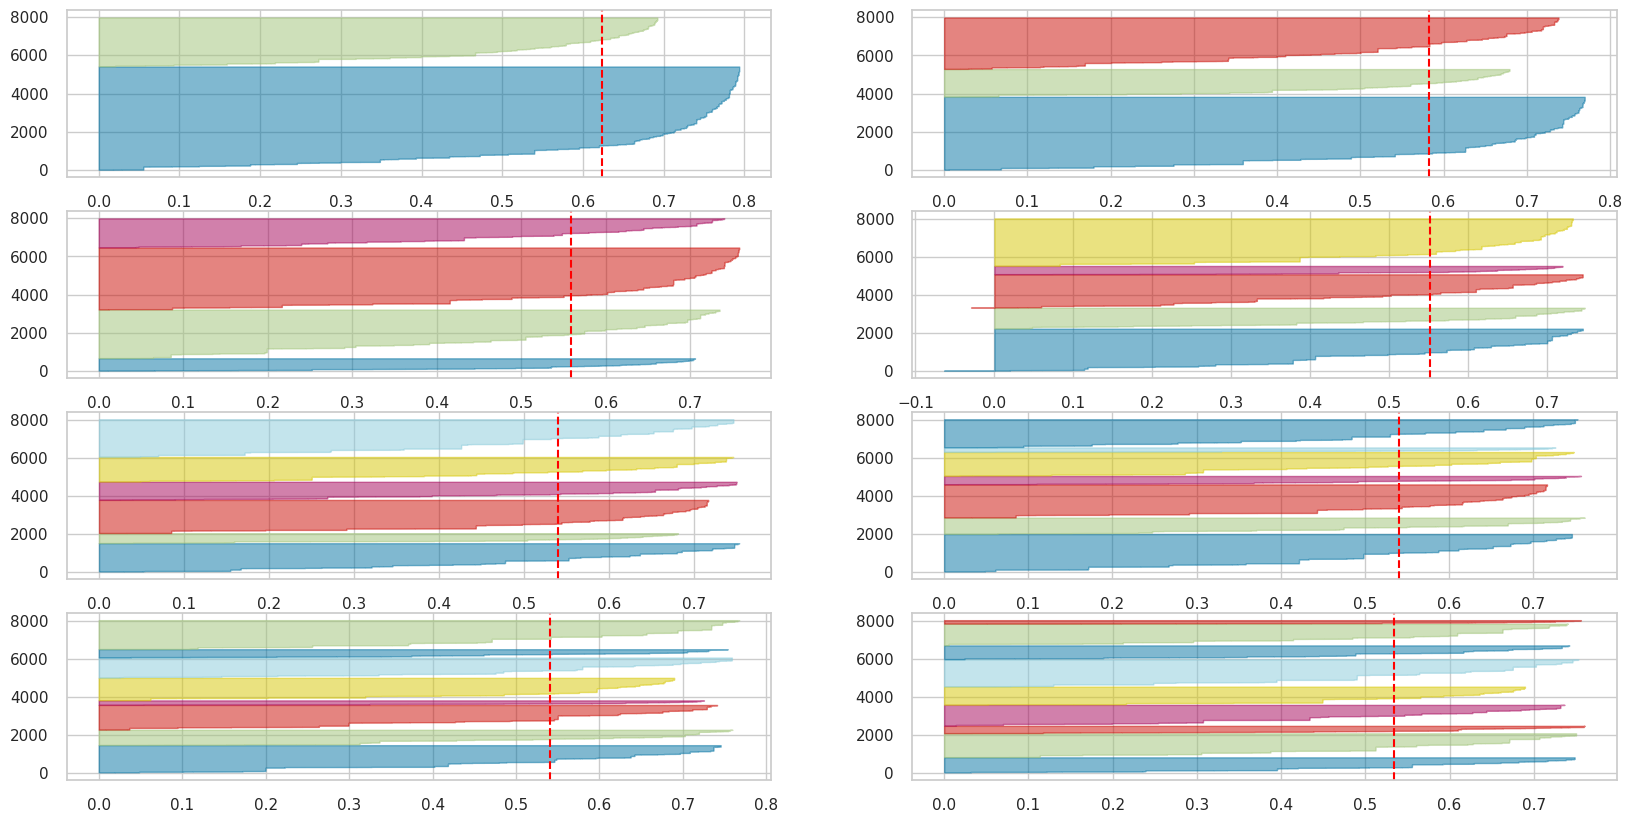

In [ ]:
num_of_cluster = [2, 3, 4, 5, 6, 7, 8, 9]

# Store
n_clusters_list = []
silhouette_coefficient_list = []

fig, ax = plt.subplots(4, 2, figsize=(20, 10))

for k in num_of_cluster:
    clusterer = KMeans(n_clusters=k, n_init=10)

    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(features_for_clustering)

    # Compute silhouette score
    cluster_labels = clusterer.fit_predict(features_for_clustering)
    silhouette_avg = silhouette_score(features_for_clustering, cluster_labels)

    # Append the results to the lists
    n_clusters_list.append(k)
    silhouette_coefficient_list.append(silhouette_avg)

    print("For n_clusters =", k, "The average silhouette_coefficient is :", silhouette_avg)

cluster_chosen_df = pd.DataFrame({
    'n_clusters': n_clusters_list,
    'average_silhouette_coefficient': silhouette_coefficient_list
})

In [ ]:
cluster_chosen_df

,n_clusters,average_silhouette_coefficient
0,2,0.623879
1,3,0.582196
2,4,0.552520
3,5,0.548950
4,6,0.539906
5,7,0.539024
6,8,0.541597
7,9,0.537358


Silhouette coefficient terbesar memiliki nilai n clusters = 2 sehingga nilai tersebut akan digunakan untuk n cluster pada komputasi selanjutnya.

In [ ]:
kmeans = KMeans(n_clusters=2)

cluster_assignment = kmeans.fit_predict(features_for_clustering)
data_with_clusters = pd.DataFrame(features_for_clustering.copy(), columns=('dist_to_subway', 'category_age_encoded', 'repair_encoded', 'material_encoded', 'district_encoded', 'price'))
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,dist_to_subway,category_age_encoded,repair_encoded,material_encoded,district_encoded,price,Clusters
0,763.0,2,2,3,5,8200000.0,1
1,437.0,0,1,2,5,14000000.0,0
2,319.0,1,1,0,2,9100000.0,1
3,2234.0,1,3,0,5,7600000.0,1
4,1201.0,1,0,0,4,10300000.0,1
...,...,...,...,...,...,...,...
10348,586.0,0,0,3,8,10500000.0,1
10349,814.0,0,0,3,4,14300000.0,0
10350,504.0,1,0,3,0,11500000.0,1
10351,814.0,0,2,2,5,11000000.0,1


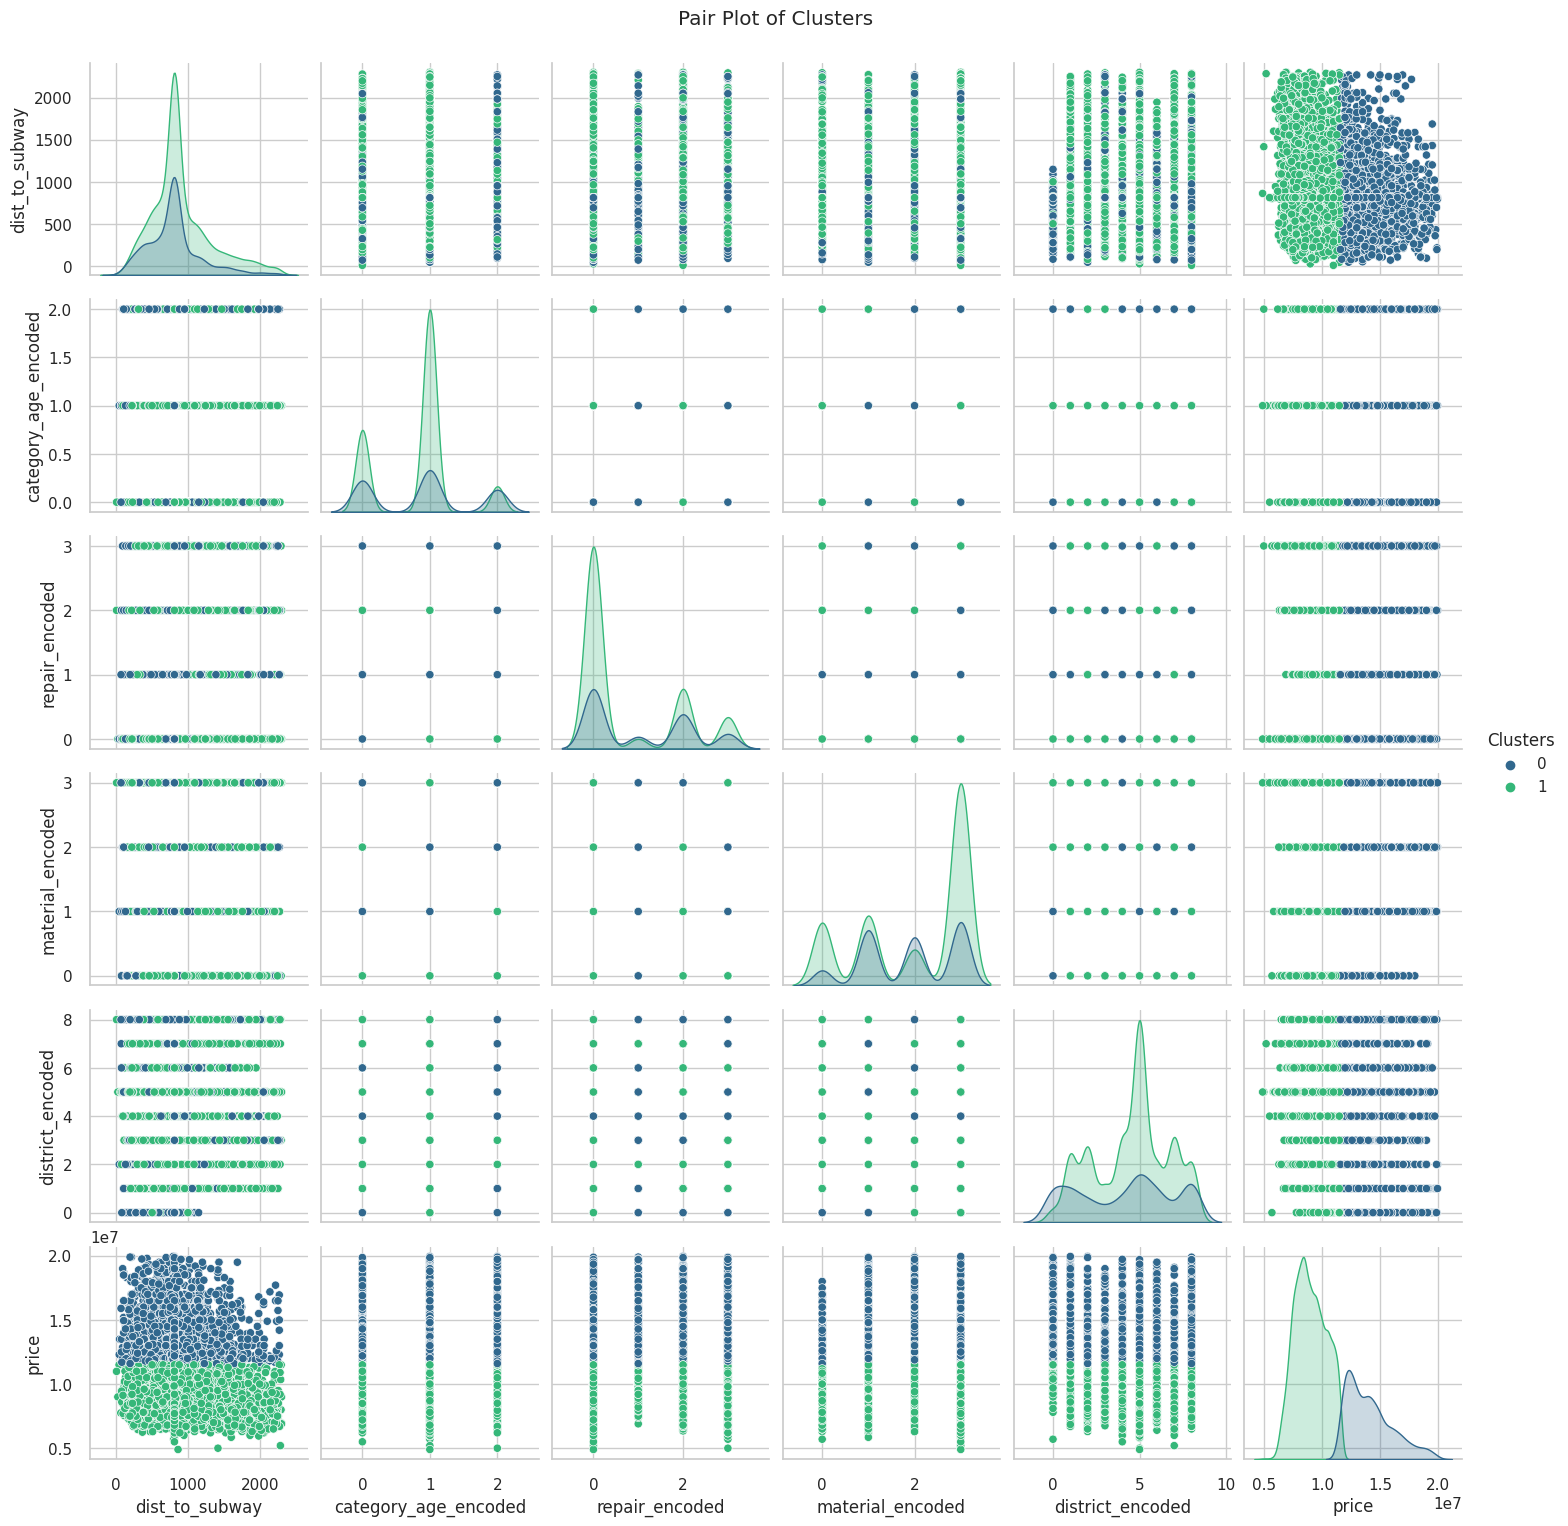

In [ ]:
sns.pairplot(data_with_clusters, hue='Clusters', diag_kind='kde', palette='viridis')
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()

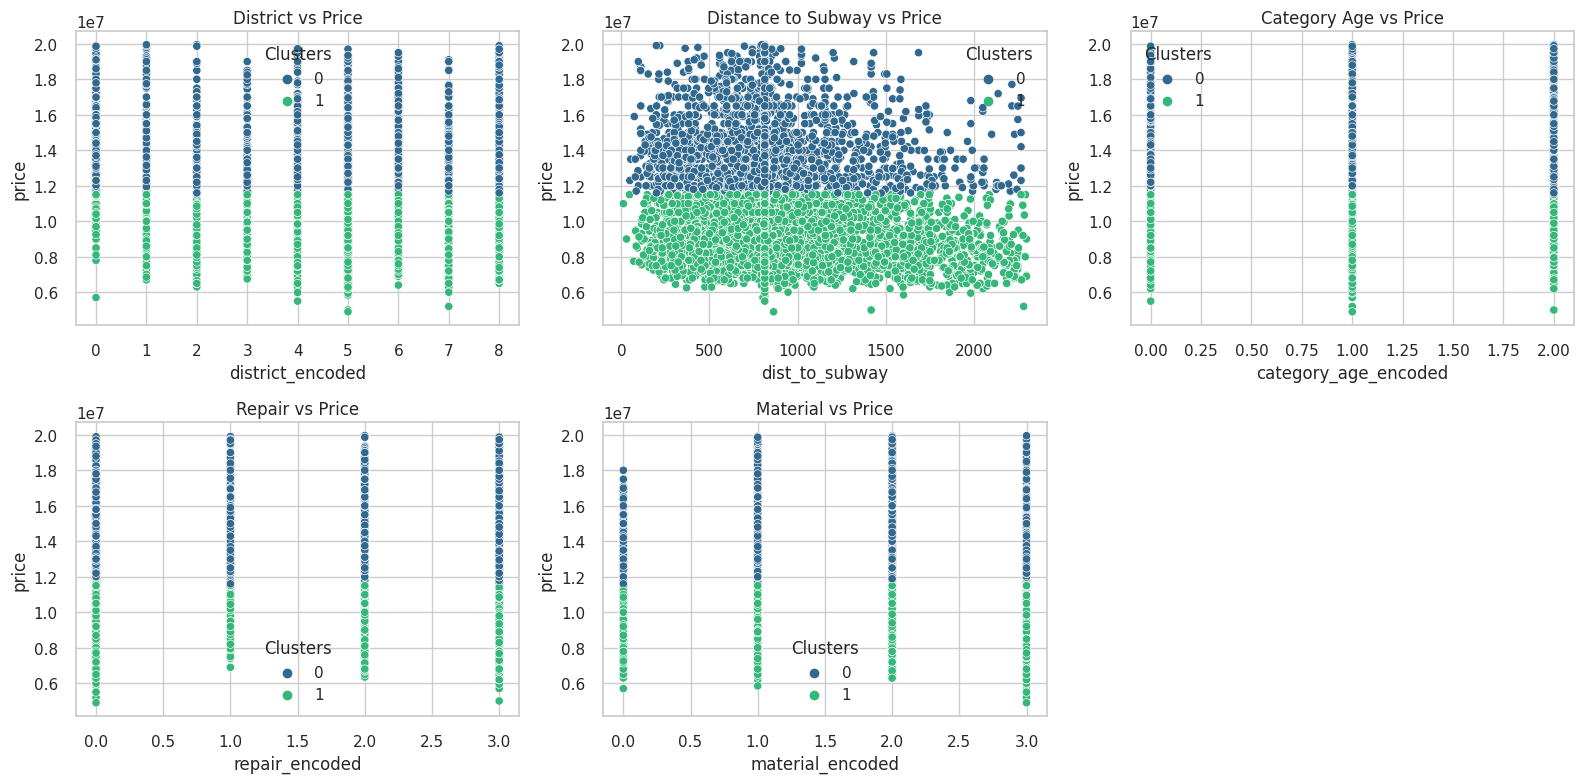

In [ ]:
# Scatter plots for specific feature combinations
plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
sns.scatterplot(x='district_encoded', y='price', hue='Clusters', data=data_with_clusters, palette='viridis')
plt.title('District vs Price')

plt.subplot(2, 3, 2)
sns.scatterplot(x='dist_to_subway', y='price', hue='Clusters', data=data_with_clusters, palette='viridis')
plt.title('Distance to Subway vs Price')

plt.subplot(2, 3, 3)
sns.scatterplot(x='category_age_encoded', y='price', hue='Clusters', data=data_with_clusters, palette='viridis')
plt.title('Category Age vs Price')

plt.subplot(2, 3, 4)
sns.scatterplot(x='repair_encoded', y='price', hue='Clusters', data=data_with_clusters, palette='viridis')
plt.title('Repair vs Price')

plt.subplot(2, 3, 5)
sns.scatterplot(x='material_encoded', y='price', hue='Clusters', data=data_with_clusters, palette='viridis')
plt.title('Material vs Price')

plt.tight_layout()
plt.show()

Dengan asumsi bahwa hijau = kaya dan biru = biasa karena hijau merepresentasikan bangunan dengan harga yang tinggi, maka harga suatu rumah tidak terikat dengan material, kebutuhan repair, umur bangunan, jarak dengan subway, dan distrik rumah tersebut. Kesimpulan tersebut diperoleh dari ratanya distribusi kedua cluster.

# 2b - Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, precision_score, recall_score, accuracy_score
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from scipy.stats import zscore
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor

In [ ]:
def metrics(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, y_pred)

    print('MAE: ' + str(round(MAE,4)))
    print('MSE: ' + str(round(MSE,4)))
    print('RMSE: ' + str(round(RMSE,4)))
    print('R_squared: ' + str(round(R_squared,4)))

In [ ]:
def visualize_result(model, X_train, X_test, y_train, y_test):
    visualizer = PredictionError(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

In [ ]:
def visualize_residual(model, X_train, X_test, y_train, y_test):
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

### Preprocessing

In [ ]:
# Melakukan drop kolom kategorikal closest_subway karena jumlah uniknya ada ratusan
# dan juga dianggap bisa diwakilkan oleh dist_to_subway
df_reg = data_clean.drop(columns='closest_subway').copy()

# Menghapus kolom ID karena hanya berperan sebagai index
df_reg.drop(columns='ID', inplace=True)

# Memisahkan fitur target
X_reg = df_reg.drop(columns='price')
y_reg = df_reg['price']

### Normalization

Lakukan normalisasi pada kolom numerikal menggunakan zscore.


In [ ]:
num_cols = X_reg[[i for i in X_reg if X_reg[i].dtype != "object"]].columns
X_reg[num_cols] = X_reg[num_cols].apply(zscore)

Untuk kolom `subway_dist_to_center` dan `dist_to_subway` kalikan dengan -1 Karena semakin kecil nilainya semakin baik.

In [ ]:
X_reg['subway_dist_to_center'] *= -1
X_reg['dist_to_subway'] *= -1

Tidak perlu melakukan standarisasi pada longitude dan latitude. Walau merupakan data numerik, namun besar kecilnya nilai tidak  selalu berhubungan dengan bagus tidaknya data yang dihasilkan.

In [ ]:
X_reg['longitude'] = df_reg['longitude']
X_reg['latitude'] = df_reg['latitude']

### Encoding

In [ ]:
X_reg["rooms"] = X_reg["rooms"].map({
    "One Room": 0,
    "Two Room": 1,
})

X_reg["repair"] = X_reg["repair"].map({
    "Poor": 0,
    "Enough": 1,
    "Good": 2,
    "Excellent": 3,
})

X_reg["category_age"] = X_reg["category_age"].map({
    "Old buildings": 0,
    "Middle-aged buildings": 1,
    "Young buildings": 2,
})

X_reg["material"] = X_reg["material"].map({
    "block": 0,
    "panel": 1,
    "brick": 2,
    "monolith": 3,
})

X_reg["subway_grade"] = X_reg["subway_grade"].map({
    "Suburban rail": 0,
    "Monorail": 1,
    "Underground": 2,
    "Urban rail": 3,
})

X_reg["district"] = X_reg["district"].map({
    "VAO": 0,
    "UVAO": 1,
    "UAO": 2,
    "SVAO": 3,
    "SAO": 4,
    "SZAO": 5,
    "UZAO": 6,
    "ZAO": 7,
    "CAO": 8,
})

In [ ]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=69)

### Regression Method Selection

In [ ]:
linear_reg = LinearRegression()
lasso_reg = Lasso()
ridge_reg = Ridge()
tree_reg = DecisionTreeRegressor(random_state=69)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=69)
xgb_reg = XGBRegressor(random_state=69)
mlp_reg = MLPRegressor(random_state=42)
gboost_reg = GradientBoostingRegressor(n_estimators=100, random_state=69)
lgbm_reg = LGBMRegressor(objective='regression', n_estimators=100)

models = [linear_reg, lasso_reg, ridge_reg, tree_reg, rf_reg, xgb_reg, mlp_reg, gboost_reg, lgbm_reg]
model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression',
               'Decision Tree Regression', 'Random Forest Regression', 'XGBoost Regressor', 'MLP Regressor',
              'Gradient Boosting Regressor', 'Light Gradient Boosting Regressor']

for model, name in zip(models, model_names):
  print(name)
  print("="*40)
  model.fit(X_reg_train, y_reg_train)
  y_reg_pred = model.predict(X_reg_test)
  metrics(y_reg_test, y_reg_pred)
  print()

Linear Regression
MAE: 1204573.7254
MSE: 2509374510044.107
RMSE: 1584100.5366
R_squared: 0.7351

Lasso Regression
MAE: 1204572.4687
MSE: 2509373223290.7344
RMSE: 1584100.1304
R_squared: 0.7351

Ridge Regression
MAE: 1204302.4687
MSE: 2508933974974.0874
RMSE: 1583961.4815
R_squared: 0.7352

Decision Tree Regression
MAE: 1292527.7473
MSE: 3493189611243.7056
RMSE: 1869007.6541
R_squared: 0.6313

Random Forest Regression
MAE: 940530.1315
MSE: 1676104616186.4866
RMSE: 1294644.5907
R_squared: 0.8231

XGBoost Regressor
MAE: 928503.9536
MSE: 1661046135876.402
RMSE: 1288815.7882
R_squared: 0.8247

MLP Regressor


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE: 10396769.3966
MSE: 117475019028387.0
RMSE: 10838589.3468
R_squared: -11.4009

Gradient Boosting Regressor
MAE: 1007684.7051
MSE: 1903943486816.1145
RMSE: 1379834.5868
R_squared: 0.799

Light Gradient Boosting Regressor
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1369
[LightGBM] [Info] Number of data points in the train set: 7501, number of used features: 15
[LightGBM] [Info] Start training from score 10862051.448474
MAE: 915402.8216
MSE: 1571641054744.855
RMSE: 1253651.0897
R_squared: 0.8341



Melihat nilai metrik didapatkan tiga model regresi terbaik, yaitu menggunakan `RandomForestRegressor`, `XGBRegressor`, dan `LGBMRegressor`. Berikut visualisasi residual plot pada ketiga model tersebut.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


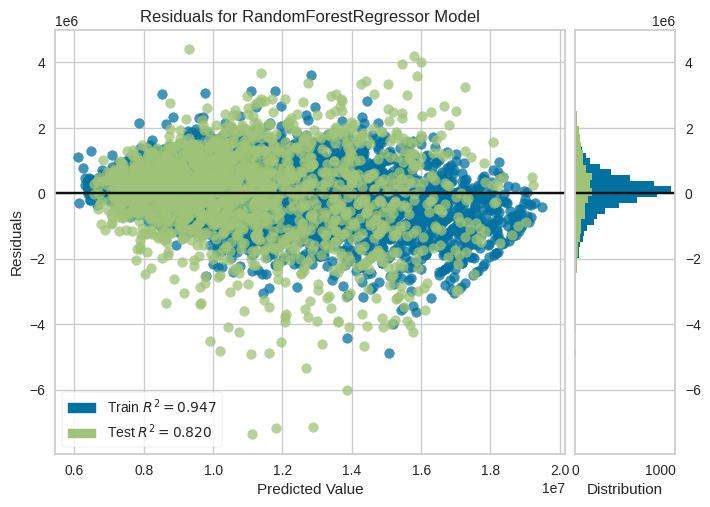

In [ ]:
visualize_residual(rf_reg, X_reg_train, X_reg_test, y_reg_train, y_reg_test)

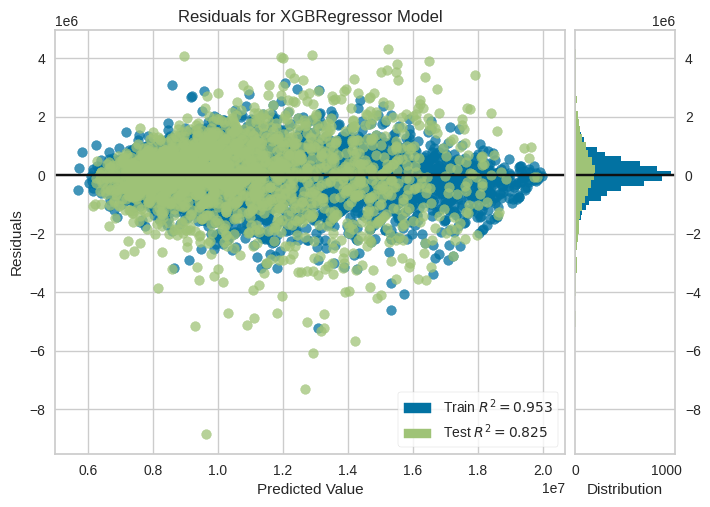

In [ ]:
visualize_residual(xgb_reg, X_reg_train, X_reg_test, y_reg_train, y_reg_test)

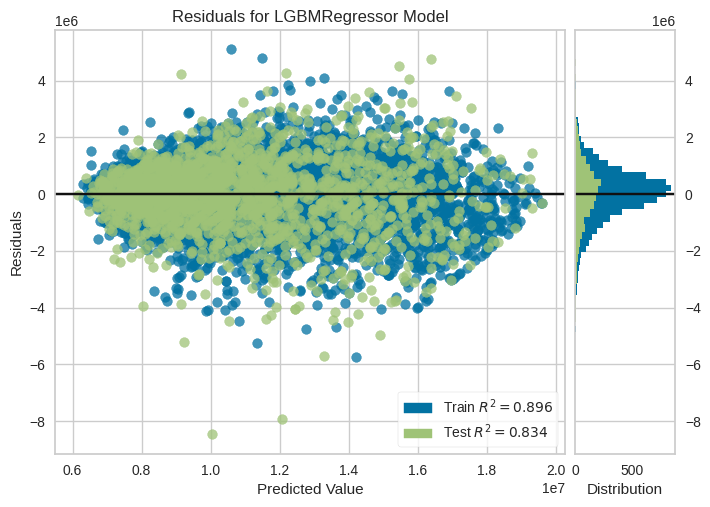

In [ ]:
visualize_residual(lgbm_reg, X_reg_train, X_reg_test, y_reg_train, y_reg_test)

Selanjutnya, lakukan hyperparameter tuning pada ketiga model dan bandingkan kembali nilai metriknya.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# https://medium.com/@rithpansanga/optimizing-xgboost-a-guide-to-hyperparameter-tuning-77b6e48e289d
param_xgb = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
}
xgb_reg = XGBRegressor(random_state=69, n_estimators=1000)
CV_xgb = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_xgb, scoring='neg_root_mean_squared_error',n_jobs=-1,cv= 3, verbose=2)
CV_xgb.fit(X_reg_train,y_reg_train)
print("Best hyperparameter for XGBRegressor: ")
print(CV_xgb.best_params_, -1*CV_xgb.best_score_)
print()

param_lgbm = {
    'learning_rate': [0.1, 0.05],
    'colsample_bytree': [0.7, 0.9],
    'n_estimators':[1000]
}
lgbm_reg = LGBMRegressor(objective='regression')
CV_lgbm = GridSearchCV(estimator=lgbm_reg, param_grid=param_lgbm, scoring='neg_root_mean_squared_error',n_jobs=-1,cv=3)
CV_lgbm.fit(X_reg_train,y_reg_train)
print("Best hyperparameter for LGBMRegressor: ")
print(CV_lgbm.best_params_, -1*CV_lgbm.best_score_)
print()


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameter for XGBRegressor: 
{'learning_rate': 0.03124177163985397, 'max_depth': 5} -1259634.9762489393

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1369
[LightGBM] [Info] Number of data points in the train set: 7501, number of used features: 15
[LightGBM] [Info] Start training from score 10862051.448474
Best hyperparameter for LGBMRegressor: 
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'n_estimators': 1000} -1248450.9404934936



In [ ]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
param_rf = {
    'bootstrap': [True],
    'max_depth': [90, 140],
    'min_samples_split': [8, 12],
    'n_estimators':[1000]

}
rf_reg = RandomForestRegressor(random_state=69)
CV_rf = GridSearchCV(estimator=rf_reg, param_grid=param_rf, scoring='neg_root_mean_squared_error',n_jobs=-1,cv= 3, verbose=2)
CV_rf.fit(X_reg_train,y_reg_train)
print("Best hyperparameter for RandomForestRegressor: ")
print(CV_rf.best_params_, CV_rf.best_score_)
print()

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best hyperparameter for RandomForestRegressor: 
{'bootstrap': True, 'max_depth': 90, 'min_samples_split': 8, 'n_estimators': 1000} -1377506.0403835878



In [ ]:
xgb_reg = XGBRegressor(random_state=69,
                       n_estimators=1000,
                       learning_rate=0.312,
                       max_depth=5)
print("XGBRegressor")
print("="*40)
xgb_reg.fit(X_reg_train, y_reg_train)
y_reg_pred = xgb_reg.predict(X_reg_test)
metrics(y_reg_test, y_reg_pred)
print()

lgbm_reg = LGBMRegressor(objective='regression',
                         colsample_bytree= 0.7,
                         learning_rate=0.05,
                         n_estimators=1000)
print("LGBMRegressor")
print("="*40)
lgbm_reg.fit(X_reg_train, y_reg_train)
y_reg_pred = lgbm_reg.predict(X_reg_test)
metrics(y_reg_test, y_reg_pred)
print()

rf_reg = RandomForestRegressor(random_state=69,
                               n_estimators=1000,
                               bootstrap=True,
                               max_depth=90,
                               min_samples_split=8)
print("Random Fast Regression")
print("="*40)
rf_reg.fit(X_reg_train, y_reg_train)
y_reg_pred = rf_reg.predict(X_reg_test)
metrics(y_reg_test, y_reg_pred)
print()

XGBRegressor
MAE: 923914.2655
MSE: 1609483511633.76
RMSE: 1268654.2128
R_squared: 0.8301

LGBMRegressor
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1369
[LightGBM] [Info] Number of data points in the train set: 7501, number of used features: 15
[LightGBM] [Info] Start training from score 10862051.448474
MAE: 858796.3184
MSE: 1432345274273.2698
RMSE: 1196806.281
R_squared: 0.8488

Random Fast Regression
MAE: 951870.8264
MSE: 1701214224763.3608
RMSE: 1304306.0319
R_squared: 0.8204



Terlihat bahwa model yang terbaik adalah menggunakan `LGBMRegressor`. Berikut residual plot dari ketiga model yang diuji.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


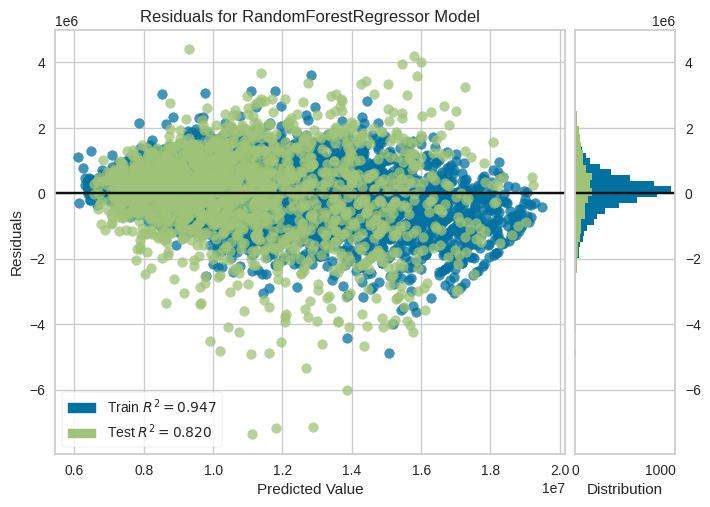

In [ ]:
visualize_residual(rf_reg, X_reg_train, X_reg_test, y_reg_train, y_reg_test)

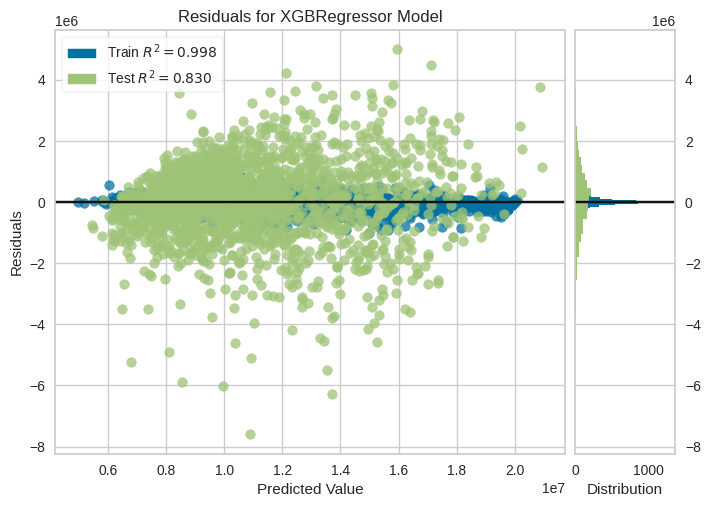

In [ ]:
visualize_residual(xgb_reg, X_reg_train, X_reg_test, y_reg_train, y_reg_test)

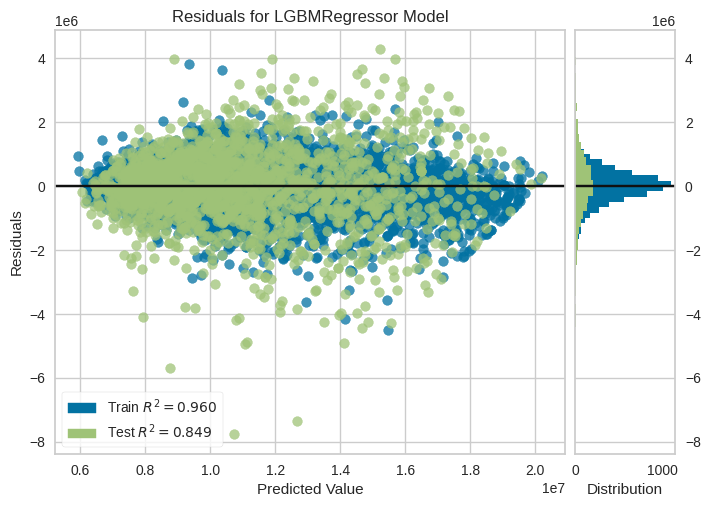

In [ ]:
visualize_residual(lgbm_reg, X_reg_train, X_reg_test, y_reg_train, y_reg_test)

## Kaggle - Regression

In [ ]:
df_reg_subm = pd.read_csv('/content/drive/MyDrive/data_regresi_test.csv')
df_reg_subm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     907 non-null    object 
 1   latitude               801 non-null    float64
 2   longitude              875 non-null    float64
 3   district               784 non-null    object 
 4   address_offers         863 non-null    float64
 5   agent_offers           734 non-null    float64
 6   subway_offers          666 non-null    float64
 7   closest_subway         811 non-null    object 
 8   dist_to_subway         668 non-null    float64
 9   subway_grade           832 non-null    object 
 10  subway_dist_to_center  826 non-null    float64
 11  rooms                  789 non-null    object 
 12  floor                  758 non-null    float64
 13  max_floor              784 non-null    float64
 14  footage                776 non-null    float64
 15  materi

In [ ]:
check_null(df_reg_subm)

,Total,Percent,Dtype
material,2,0.220507,object
longitude,32,3.528115,float64
address_offers,44,4.851158,float64
subway_grade,75,8.269019,object
subway_dist_to_center,81,8.930540,float64
closest_subway,96,10.584344,object
latitude,106,11.686880,float64
rooms,118,13.009923,object
district,123,13.561191,object
max_floor,123,13.561191,float64


In [ ]:
df_reg_subm.drop(columns='subway_offers', inplace=True)
df_reg_subm.drop(columns='closest_subway', inplace=True)
df_id = df_reg_subm['ID']
df_reg_subm.drop(columns='ID', inplace=True)

# Untuk sisanya, lakukan imputasi data
for i in check_null(df_reg_subm).index:
  # Kasus jika kolom kategorikal
  if df_reg_subm[i].dtype == "object":
    df_reg_subm[i].fillna(df_reg_subm[i].mode()[0], inplace = True)
  # Kasus jika kolom numerikal dan dan berdistribusi skewed
  elif df_reg_subm[i].skew() < -0.5 or df_reg_subm[i].skew() > 0.5:
    df_reg_subm[i].fillna(df_reg_subm[i].median(), inplace = True)
  # Kasus jika kolom numerikal dan dan berdistribusi normal
  else:
    df_reg_subm[i].fillna(df_reg_subm[i].mean(), inplace = True)
check_null(df_reg_subm)

Tidak ditemukan missing value pada dataset


In [ ]:
lgbm_reg = LGBMRegressor(objective='regression',
                         colsample_bytree= 0.7,
                         learning_rate=0.05,
                         n_estimators=1000)
lgbm_reg.fit(X_reg_train, y_reg_train)

num_cols = df_reg_subm[[i for i in df_reg_subm if df_reg_subm[i].dtype != "object" and (i != 'longitude' or i != 'latitude')]].columns
df_reg_subm[num_cols] = df_reg_subm[num_cols].apply(zscore)
df_reg_subm['subway_dist_to_center'] *= -1
df_reg_subm['dist_to_subway'] *= -1

df_reg_subm["rooms"] = df_reg_subm["rooms"].map({
    "One Room": 0,
    "Two Room": 1,
})

df_reg_subm["repair"] = df_reg_subm["repair"].map({
    "Poor": 0,
    "Enough": 1,
    "Good": 2,
    "Excellent": 3,
})

df_reg_subm["category_age"] = df_reg_subm["category_age"].map({
    "Old buildings": 0,
    "Middle-aged buildings": 1,
    "Young buildings": 2,
})

df_reg_subm["material"] = df_reg_subm["material"].map({
    "block": 0,
    "panel": 1,
    "brick": 2,
    "monolith": 3,
})

df_reg_subm["subway_grade"] = df_reg_subm["subway_grade"].map({
    "Suburban rail": 0,
    "Monorail": 1,
    "Underground": 2,
    "Urban rail": 3,
})

df_reg_subm["district"] = df_reg_subm["district"].map({
    "VAO": 0,
    "UVAO": 1,
    "UAO": 2,
    "SVAO": 3,
    "SAO": 4,
    "SZAO": 5,
    "UZAO": 6,
    "ZAO": 7,
    "CAO": 8,
})
y_pred = lgbm_reg.predict(df_reg_subm)
y_pred

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1374
[LightGBM] [Info] Number of data points in the train set: 9377, number of used features: 15
[LightGBM] [Info] Start training from score 10869312.491735


array([13044061.04270822, 11672877.45141746,  7923826.64425662,
        7548824.06638777, 11947189.65711541,  7356820.0864268 ,
       10053415.1062451 , 11442774.98543775, 10354482.02696857,
       10561027.57267925,  7880149.17443734, 10407958.77111456,
       10101375.59255291,  8321867.3680876 , 13337961.5575374 ,
        8740170.87260031,  7078783.23955289,  8092171.06426061,
        8680794.73009455,  7292454.32726495, 15425434.64353441,
        7577262.38930594,  6112343.05404462,  9490718.63351841,
        8092017.03393656, 13026887.69694666,  6869377.24998191,
        7695207.21315511,  8149296.70261485, 10435967.35937079,
        7461389.40981193,  9161071.48940456,  6628050.33045184,
        8816502.87260854,  7395778.14599019,  7664018.76358692,
        9534210.79687732, 11533105.22066185,  7110311.68206518,
       12566989.21524345,  7398673.09804695,  8737424.82157869,
        7870158.8961839 ,  8909759.06003695,  8407399.32697589,
        7860725.44069684, 10355871.00757

In [ ]:
sub = pd.DataFrame()
sub['ID'] = df_id
sub['price'] = y_pred
sub.to_csv('regression_AL_KASMOM_FINAL.csv',index=False)